In [10]:
%load_ext autoreload
%autoreload 2

import os
import gym 
from matplotlib import pyplot as plt
import numpy as np
from ddpg_torch.ddpg_agent import Agent
from envs.escape_room_continuous_space_env import EscapeRoomEnv
from tqdm import trange
import seaborn as sns
from constants import (
    CHECKPOINT_RADIUS,
    ENV_HEIGHT,
    ENV_WIDTH,
    MAX_WHEEL_VELOCITY,
    SCALE_FACTOR,
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# Goal (350, 450)

def train_diff_robot_custom_env(alpha=0.00001, beta=0.0001, tau=0.001, n_games=1500):
    env = EscapeRoomEnv(max_steps_per_episode=2000, goal = (350 , 450))
    agent = Agent(
        alpha=alpha,
        beta=beta,
        input_dims=env.observation_space.shape,
        tau=tau,
        batch_size=64,
        fc1_dims=400,
        fc2_dims=300,
        n_actions=env.action_space.shape[0],
    )

    filename = f"EscapeRoom_alpha_{agent.alpha}_beta_{agent.beta}_{n_games}_games"
    figure_file = f"plots/{filename}.png"
    score_history = []
    critic_losses = []
    actor_losses = []
    rewards = []
    actions = []
    states = []
    next_states = []

    save_interval = n_games // 10  # Save model and plot every 10% of n_games
    pbar = trange(n_games)

    for i in pbar:
        state, info = env.reset()
        done = False
        score = 0

        while not done:
            action = agent.choose_action(state)
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            agent.remember(state, action, reward, next_state, done)
            learn_outputs = agent.learn()
            if learn_outputs:
                critic_loss, actor_loss = learn_outputs
            else:
                critic_loss, actor_loss = (0, 0)  # Default values when learning doesn't happen

            score += reward
            state = next_state

            # Collect data for analysis
            rewards.append(reward)
            actions.append(action)
            states.append(state)
            next_states.append(next_state)
            score_history.append(score)
            critic_losses.append(critic_loss)
            actor_losses.append(actor_loss)

        avg_score = np.mean(score_history)  # Calculate average score after appending current score

        if i % save_interval == 0 or i == n_games - 1:  # Save model and plot at intervals
            agent.save_models()

        pbar.set_description(
            f"Episode {i}: Score {score:.1f}, Info : {info['reason']}, Average Score {avg_score:.3f}, Actor Losses {actor_losses[-1]:.3f}, Critic Losses {critic_losses[-1]:.3f}"
        )

    return {
        "no_of_games" : n_games,
        "score_history": score_history,
        "critic_losses": critic_losses,
        "actor_losses": actor_losses,
        "rewards": rewards,
        "actions": actions,
        "states": states,
        "next_states": next_states,
        "figure_file": figure_file
    }

In [12]:
training_data = train_diff_robot_custom_env()

  0%|          | 0/1500 [00:00<?, ?it/s]

Episode 364: Score 6044.4, Info : Goal_reached, Average Score -1717.408, Actor Losses 48.935, Critic Losses 17.040:  24%|██▍       | 365/1500 [05:31<39:51,  2.11s/it]         

Goal 'G' reached in 550 steps with cumulative reward 5767.920796439272 for this episode.


Episode 365: Score 5080.5, Info : Goal_reached, Average Score -1680.383, Actor Losses 47.730, Critic Losses 15.173:  24%|██▍       | 366/1500 [05:39<1:12:20,  3.83s/it]

Goal 'G' reached in 1859 steps with cumulative reward 5366.124054284192 for this episode.


Episode 374: Score 5891.0, Info : Goal_reached, Average Score -1609.778, Actor Losses 52.918, Critic Losses 13.866:  25%|██▌       | 375/1500 [05:53<26:56,  1.44s/it]    

Goal 'G' reached in 708 steps with cumulative reward 5672.183737678588 for this episode.


Episode 381: Score 5948.4, Info : Goal_reached, Average Score -1512.942, Actor Losses 39.429, Critic Losses 15.932:  25%|██▌       | 382/1500 [06:19<1:01:09,  3.28s/it]     

Goal 'G' reached in 573 steps with cumulative reward 5752.439792942598 for this episode.


Episode 382: Score 6306.9, Info : Goal_reached, Average Score -1507.397, Actor Losses 40.369, Critic Losses 38.394:  26%|██▌       | 383/1500 [06:20<49:26,  2.66s/it]  

Goal 'G' reached in 287 steps with cumulative reward 6038.730359653912 for this episode.


Episode 427: Score 5823.8, Info : Goal_reached, Average Score -1226.956, Actor Losses 13.371, Critic Losses 36.897:  29%|██▊       | 428/1500 [07:52<1:00:55,  3.41s/it]       

Goal 'G' reached in 760 steps with cumulative reward 5646.187494586671 for this episode.


Episode 428: Score 6178.4, Info : Goal_reached, Average Score -1222.570, Actor Losses 29.307, Critic Losses 18.636:  29%|██▊       | 429/1500 [07:53<50:35,  2.83s/it]  

Goal 'G' reached in 356 steps with cumulative reward 5945.185034671632 for this episode.


Episode 431: Score 6393.7, Info : Goal_reached, Average Score -1210.783, Actor Losses 16.349, Critic Losses 22.808:  29%|██▉       | 432/1500 [07:57<32:45,  1.84s/it]

Goal 'G' reached in 220 steps with cumulative reward 6155.822902562619 for this episode.


Episode 452: Score 6779.5, Info : Goal_reached, Average Score -1138.179, Actor Losses -25.401, Critic Losses 7.290:  30%|███       | 453/1500 [08:26<10:54,  1.60it/s]   

Goal 'G' reached in 79 steps with cumulative reward 6636.950957227763 for this episode.


Episode 456: Score 6283.0, Info : Goal_reached, Average Score -1217.057, Actor Losses 5.111, Critic Losses 32.156:  30%|███       | 457/1500 [08:46<59:52,  3.44s/it]          

Goal 'G' reached in 295 steps with cumulative reward 6027.0900552830335 for this episode.


Episode 464: Score 6793.7, Info : Goal_reached, Average Score -1262.774, Actor Losses -26.443, Critic Losses 31.269:  31%|███       | 465/1500 [08:58<15:15,  1.13it/s]      

Goal 'G' reached in 76 steps with cumulative reward 6654.026385232916 for this episode.


Episode 467: Score 6719.3, Info : Goal_reached, Average Score -1259.462, Actor Losses -13.597, Critic Losses 25.651:  31%|███       | 468/1500 [08:59<10:06,  1.70it/s]

Goal 'G' reached in 92 steps with cumulative reward 6562.269104427964 for this episode.


Episode 478: Score 6591.1, Info : Goal_reached, Average Score -1305.004, Actor Losses -21.796, Critic Losses 10.954:  32%|███▏      | 479/1500 [09:11<08:59,  1.89it/s]      

Goal 'G' reached in 128 steps with cumulative reward 6407.162333583274 for this episode.


Episode 484: Score 6826.3, Info : Goal_reached, Average Score -1299.253, Actor Losses -27.059, Critic Losses 18.476:  32%|███▏      | 485/1500 [09:14<06:22,  2.65it/s]

Goal 'G' reached in 70 steps with cumulative reward 6693.774511676164 for this episode.


Episode 492: Score 6382.0, Info : Goal_reached, Average Score -1276.337, Actor Losses -19.217, Critic Losses 10.156:  33%|███▎      | 493/1500 [09:23<25:01,  1.49s/it] 

Goal 'G' reached in 217 steps with cumulative reward 6163.287929389362 for this episode.


Episode 493: Score 6778.7, Info : Goal_reached, Average Score -1275.464, Actor Losses -54.083, Critic Losses 47.129:  33%|███▎      | 494/1500 [09:23<19:08,  1.14s/it]

Goal 'G' reached in 79 steps with cumulative reward 6636.717843084759 for this episode.


Episode 494: Score 6729.5, Info : Goal_reached, Average Score -1274.472, Actor Losses -20.429, Critic Losses 26.845:  33%|███▎      | 495/1500 [09:24<15:18,  1.09it/s]

Goal 'G' reached in 90 steps with cumulative reward 6573.364141902876 for this episode.


Episode 495: Score 6810.3, Info : Goal_reached, Average Score -1273.664, Actor Losses -17.322, Critic Losses 53.887:  33%|███▎      | 496/1500 [09:24<12:15,  1.36it/s]

Goal 'G' reached in 73 steps with cumulative reward 6674.003813848576 for this episode.


Episode 496: Score 6774.8, Info : Goal_reached, Average Score -1272.784, Actor Losses -29.563, Critic Losses 49.354:  33%|███▎      | 497/1500 [09:24<10:16,  1.63it/s]

Goal 'G' reached in 80 steps with cumulative reward 6631.220297358435 for this episode.


Episode 497: Score 6898.6, Info : Goal_reached, Average Score -1272.126, Actor Losses -23.260, Critic Losses 19.875:  33%|███▎      | 498/1500 [09:24<08:27,  1.98it/s]

Goal 'G' reached in 59 steps with cumulative reward 6778.337748731405 for this episode.


Episode 501: Score 6935.3, Info : Goal_reached, Average Score -1269.467, Actor Losses -40.661, Critic Losses 38.006:  33%|███▎      | 502/1500 [09:26<05:24,  3.08it/s]  

Goal 'G' reached in 54 steps with cumulative reward 6821.548401202517 for this episode.


Episode 517: Score 6927.1, Info : Goal_reached, Average Score -1362.154, Actor Losses -69.116, Critic Losses 40.933:  35%|███▍      | 518/1500 [09:47<10:28,  1.56it/s]         

Goal 'G' reached in 55 steps with cumulative reward 6811.379933428798 for this episode.


Episode 518: Score 6928.3, Info : Goal_reached, Average Score -1361.525, Actor Losses -31.932, Critic Losses 52.771:  35%|███▍      | 519/1500 [09:47<08:34,  1.91it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.438046292492 for this episode.


Episode 521: Score 5301.1, Info : Goal_reached, Average Score -1456.372, Actor Losses -89.791, Critic Losses 82.279:  35%|███▍      | 522/1500 [10:06<59:19,  3.64s/it]         

Goal 'G' reached in 269 steps with cumulative reward 6068.356235394898 for this episode.


Episode 524: Score 6905.9, Info : Goal_reached, Average Score -1504.746, Actor Losses -66.401, Critic Losses 365.784:  35%|███▌      | 525/1500 [10:19<1:00:57,  3.75s/it]      

Goal 'G' reached in 58 steps with cumulative reward 6786.63437626791 for this episode.


Episode 529: Score 6920.6, Info : Goal_reached, Average Score -1546.199, Actor Losses -91.820, Critic Losses 223.254:  35%|███▌      | 530/1500 [10:29<33:40,  2.08s/it]        

Goal 'G' reached in 56 steps with cumulative reward 6803.687609217254 for this episode.


Episode 530: Score 6936.1, Info : Goal_reached, Average Score -1545.553, Actor Losses -96.642, Critic Losses 133.626:  35%|███▌      | 531/1500 [10:29<24:43,  1.53s/it]

Goal 'G' reached in 54 steps with cumulative reward 6821.457471690781 for this episode.


Episode 557: Score 6839.7, Info : Goal_reached, Average Score -1568.774, Actor Losses -105.790, Critic Losses 73.573:  37%|███▋      | 558/1500 [10:46<04:59,  3.14it/s]       

Goal 'G' reached in 68 steps with cumulative reward 6709.025492478801 for this episode.


Episode 558: Score 6877.7, Info : Goal_reached, Average Score -1568.049, Actor Losses -105.342, Critic Losses 1068.961:  37%|███▋      | 559/1500 [10:46<04:49,  3.25it/s]

Goal 'G' reached in 62 steps with cumulative reward 6753.575059049606 for this episode.


Episode 566: Score 6944.0, Info : Goal_reached, Average Score -1562.923, Actor Losses -105.412, Critic Losses 143.408:  38%|███▊      | 567/1500 [10:48<04:08,  3.75it/s] 

Goal 'G' reached in 53 steps with cumulative reward 6830.650989684284 for this episode.


Episode 646: Score 6928.4, Info : Goal_reached, Average Score -1793.140, Actor Losses -193.560, Critic Losses 2165.777:  43%|████▎     | 647/1500 [12:14<09:44,  1.46it/s]         

Goal 'G' reached in 55 steps with cumulative reward 6812.621998173822 for this episode.


Episode 647: Score 6927.6, Info : Goal_reached, Average Score -1792.495, Actor Losses -221.856, Critic Losses 466.445:  43%|████▎     | 648/1500 [12:14<07:48,  1.82it/s] 

Goal 'G' reached in 55 steps with cumulative reward 6811.110670809642 for this episode.


Episode 648: Score 6927.8, Info : Goal_reached, Average Score -1791.851, Actor Losses -234.818, Critic Losses 896.188:  43%|████▎     | 649/1500 [12:14<06:30,  2.18it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.043289909116 for this episode.


Episode 649: Score 6607.9, Info : Goal_reached, Average Score -1790.717, Actor Losses -238.168, Critic Losses 2467.299:  43%|████▎     | 650/1500 [12:15<06:23,  2.22it/s]

Goal 'G' reached in 102 steps with cumulative reward 6513.45279231043 for this episode.


Episode 650: Score 6927.2, Info : Goal_reached, Average Score -1790.074, Actor Losses -239.575, Critic Losses 233.073:  43%|████▎     | 651/1500 [12:15<05:28,  2.58it/s] 

Goal 'G' reached in 55 steps with cumulative reward 6811.190834127219 for this episode.


Episode 661: Score 6943.8, Info : Goal_reached, Average Score -1782.448, Actor Losses -210.767, Critic Losses 314.938:  44%|████▍     | 662/1500 [12:18<03:38,  3.84it/s]

Goal 'G' reached in 53 steps with cumulative reward 6829.649124759592 for this episode.


Episode 662: Score 6942.4, Info : Goal_reached, Average Score -1781.833, Actor Losses -231.801, Critic Losses 394.287:  44%|████▍     | 663/1500 [12:18<03:30,  3.98it/s]

Goal 'G' reached in 53 steps with cumulative reward 6829.488576536238 for this episode.


Episode 663: Score 6895.4, Info : Goal_reached, Average Score -1781.152, Actor Losses -240.339, Critic Losses 321.480:  44%|████▍     | 664/1500 [12:19<03:31,  3.96it/s]

Goal 'G' reached in 59 steps with cumulative reward 6775.202735506003 for this episode.


Episode 671: Score 6927.8, Info : Goal_reached, Average Score -1776.199, Actor Losses -217.535, Critic Losses 213.798:  45%|████▍     | 672/1500 [12:21<03:22,  4.09it/s]

Goal 'G' reached in 55 steps with cumulative reward 6811.419110293242 for this episode.


Episode 672: Score 6936.3, Info : Goal_reached, Average Score -1775.577, Actor Losses -255.599, Critic Losses 982.670:  45%|████▍     | 673/1500 [12:21<03:20,  4.13it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.4119242847555 for this episode.


Episode 685: Score 6919.6, Info : Goal_reached, Average Score -1766.603, Actor Losses -198.136, Critic Losses 317.411:  46%|████▌     | 686/1500 [12:24<03:43,  3.63it/s]

Goal 'G' reached in 56 steps with cumulative reward 6802.649951343599 for this episode.


Episode 690: Score 5920.8, Info : Goal_reached, Average Score -1762.036, Actor Losses -215.450, Critic Losses 1037.232:  46%|████▌     | 691/1500 [12:26<05:37,  2.40it/s]

Goal 'G' reached in 167 steps with cumulative reward 6283.6860324100535 for this episode.


Episode 696: Score 6944.6, Info : Goal_reached, Average Score -1791.486, Actor Losses -281.110, Critic Losses 237.856:  46%|████▋     | 697/1500 [12:37<27:56,  2.09s/it]      

Goal 'G' reached in 53 steps with cumulative reward 6830.223519508835 for this episode.


Episode 698: Score 6942.7, Info : Goal_reached, Average Score -1790.265, Actor Losses -273.384, Critic Losses 325.060:  47%|████▋     | 699/1500 [12:37<15:24,  1.15s/it]

Goal 'G' reached in 53 steps with cumulative reward 6829.357070997178 for this episode.


Episode 706: Score 6942.6, Info : Goal_reached, Average Score -1785.263, Actor Losses -238.002, Critic Losses 477.929:  47%|████▋     | 707/1500 [12:39<04:10,  3.17it/s]

Goal 'G' reached in 53 steps with cumulative reward 6829.6077008401235 for this episode.


Episode 707: Score 6942.1, Info : Goal_reached, Average Score -1784.664, Actor Losses -294.711, Critic Losses 395.931:  47%|████▋     | 708/1500 [12:40<03:53,  3.39it/s]

Goal 'G' reached in 53 steps with cumulative reward 6829.807213500603 for this episode.


Episode 709: Score 6951.7, Info : Goal_reached, Average Score -1783.485, Actor Losses -306.328, Critic Losses 503.572:  47%|████▋     | 710/1500 [12:40<03:34,  3.68it/s]

Goal 'G' reached in 52 steps with cumulative reward 6839.94759907864 for this episode.


Episode 710: Score 6951.7, Info : Goal_reached, Average Score -1782.897, Actor Losses -282.354, Critic Losses 577.778:  47%|████▋     | 711/1500 [12:40<03:27,  3.80it/s]

Goal 'G' reached in 52 steps with cumulative reward 6839.901934605359 for this episode.


Episode 711: Score 6933.9, Info : Goal_reached, Average Score -1782.289, Actor Losses -202.150, Critic Losses 319.871:  47%|████▋     | 712/1500 [12:41<03:22,  3.89it/s]

Goal 'G' reached in 54 steps with cumulative reward 6819.242625586742 for this episode.


Episode 712: Score 6943.0, Info : Goal_reached, Average Score -1781.691, Actor Losses -239.156, Critic Losses 190.836:  48%|████▊     | 713/1500 [12:41<03:19,  3.95it/s]

Goal 'G' reached in 53 steps with cumulative reward 6829.416732804336 for this episode.


Episode 713: Score 6951.6, Info : Goal_reached, Average Score -1781.105, Actor Losses -252.777, Critic Losses 461.057:  48%|████▊     | 714/1500 [12:41<03:14,  4.03it/s]

Goal 'G' reached in 52 steps with cumulative reward 6839.96113838267 for this episode.


Episode 714: Score 6943.5, Info : Goal_reached, Average Score -1780.508, Actor Losses -320.593, Critic Losses 20380.078:  48%|████▊     | 715/1500 [12:41<03:13,  4.05it/s]

Goal 'G' reached in 53 steps with cumulative reward 6829.929616464717 for this episode.


Episode 716: Score 6944.3, Info : Goal_reached, Average Score -1779.258, Actor Losses -267.771, Critic Losses 6392.182:  48%|████▊     | 717/1500 [12:42<03:19,  3.93it/s] 

Goal 'G' reached in 53 steps with cumulative reward 6830.635855548145 for this episode.


Episode 717: Score 6920.1, Info : Goal_reached, Average Score -1778.631, Actor Losses -226.603, Critic Losses 1518.238:  48%|████▊     | 718/1500 [12:42<03:19,  3.91it/s]

Goal 'G' reached in 56 steps with cumulative reward 6803.71717680725 for this episode.


Episode 718: Score 6944.3, Info : Goal_reached, Average Score -1778.036, Actor Losses -330.365, Critic Losses 916.874:  48%|████▊     | 719/1500 [12:42<03:17,  3.96it/s] 

Goal 'G' reached in 53 steps with cumulative reward 6830.649805658303 for this episode.


Episode 719: Score 6943.6, Info : Goal_reached, Average Score -1777.441, Actor Losses -279.335, Critic Losses 798.369:  48%|████▊     | 720/1500 [12:42<03:12,  4.05it/s]

Goal 'G' reached in 53 steps with cumulative reward 6829.9124921865405 for this episode.


Episode 720: Score 6950.8, Info : Goal_reached, Average Score -1776.858, Actor Losses -290.854, Critic Losses 2193.958:  48%|████▊     | 721/1500 [12:43<03:08,  4.14it/s]

Goal 'G' reached in 52 steps with cumulative reward 6839.951080365455 for this episode.


Episode 722: Score 6916.6, Info : Goal_reached, Average Score -1775.636, Actor Losses -305.843, Critic Losses 876.592:  48%|████▊     | 723/1500 [12:43<03:08,  4.12it/s] 

Goal 'G' reached in 56 steps with cumulative reward 6801.828490060638 for this episode.


Episode 723: Score 6933.6, Info : Goal_reached, Average Score -1775.033, Actor Losses -273.454, Critic Losses 575.594:  48%|████▊     | 724/1500 [12:43<03:06,  4.17it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.530950973155 for this episode.


Episode 724: Score 6941.2, Info : Goal_reached, Average Score -1774.440, Actor Losses -296.831, Critic Losses 630.007:  48%|████▊     | 725/1500 [12:44<03:03,  4.23it/s]

Goal 'G' reached in 53 steps with cumulative reward 6829.894377059993 for this episode.


Episode 725: Score 6941.9, Info : Goal_reached, Average Score -1773.848, Actor Losses -367.562, Critic Losses 351.805:  48%|████▊     | 726/1500 [12:44<03:01,  4.27it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.57471797378 for this episode.


Episode 727: Score 6934.9, Info : Goal_reached, Average Score -1772.662, Actor Losses -304.222, Critic Losses 494.983:  49%|████▊     | 728/1500 [12:44<03:05,  4.17it/s]  

Goal 'G' reached in 54 steps with cumulative reward 6821.4733522869965 for this episode.


Episode 728: Score 6903.9, Info : Goal_reached, Average Score -1772.018, Actor Losses -303.713, Critic Losses 1454.225:  49%|████▊     | 729/1500 [12:45<03:09,  4.06it/s]

Goal 'G' reached in 58 steps with cumulative reward 6785.367684004969 for this episode.


Episode 729: Score 6862.8, Info : Goal_reached, Average Score -1771.311, Actor Losses -260.517, Critic Losses 781.774:  49%|████▊     | 730/1500 [12:45<03:21,  3.83it/s] 

Goal 'G' reached in 64 steps with cumulative reward 6737.927840102302 for this episode.


Episode 733: Score 6869.9, Info : Goal_reached, Average Score -1768.478, Actor Losses -281.731, Critic Losses 338.716:  49%|████▉     | 734/1500 [12:46<03:51,  3.31it/s]

Goal 'G' reached in 63 steps with cumulative reward 6746.518130717387 for this episode.


Episode 734: Score 6917.9, Info : Goal_reached, Average Score -1767.859, Actor Losses -280.874, Critic Losses 892.321:  49%|████▉     | 735/1500 [12:46<03:46,  3.38it/s]

Goal 'G' reached in 56 steps with cumulative reward 6802.940333245216 for this episode.


Episode 735: Score 6926.1, Info : Goal_reached, Average Score -1767.250, Actor Losses -309.528, Critic Losses 8740.921:  49%|████▉     | 736/1500 [12:47<03:34,  3.56it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.625863074981 for this episode.


Episode 736: Score 6918.4, Info : Goal_reached, Average Score -1766.631, Actor Losses -280.178, Critic Losses 803.839:  49%|████▉     | 737/1500 [12:47<03:25,  3.72it/s] 

Goal 'G' reached in 56 steps with cumulative reward 6803.75324982897 for this episode.


Episode 737: Score 6942.4, Info : Goal_reached, Average Score -1766.044, Actor Losses -273.659, Critic Losses 255.125:  49%|████▉     | 738/1500 [12:47<03:16,  3.88it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.654845163569 for this episode.


Episode 738: Score 6896.7, Info : Goal_reached, Average Score -1765.394, Actor Losses -297.075, Critic Losses 569.957:  49%|████▉     | 739/1500 [12:47<03:16,  3.87it/s]

Goal 'G' reached in 59 steps with cumulative reward 6778.341067432807 for this episode.


Episode 742: Score 6923.0, Info : Goal_reached, Average Score -1762.684, Actor Losses -197.888, Critic Losses 313.120:  50%|████▉     | 743/1500 [12:49<03:26,  3.67it/s]

Goal 'G' reached in 55 steps with cumulative reward 6810.123319170279 for this episode.


Episode 743: Score 6919.1, Info : Goal_reached, Average Score -1762.068, Actor Losses -269.851, Critic Losses 398.600:  50%|████▉     | 744/1500 [12:49<03:18,  3.81it/s]

Goal 'G' reached in 56 steps with cumulative reward 6803.758846126584 for this episode.


Episode 745: Score 6918.5, Info : Goal_reached, Average Score -1760.834, Actor Losses -247.528, Critic Losses 993.074:  50%|████▉     | 746/1500 [12:49<03:12,  3.93it/s]

Goal 'G' reached in 56 steps with cumulative reward 6803.771482843566 for this episode.


Episode 746: Score 6949.9, Info : Goal_reached, Average Score -1760.261, Actor Losses -264.714, Critic Losses 440.345:  50%|████▉     | 747/1500 [12:50<03:04,  4.08it/s]

Goal 'G' reached in 52 steps with cumulative reward 6839.908042430838 for this episode.


Episode 747: Score 6951.1, Info : Goal_reached, Average Score -1759.688, Actor Losses -363.373, Critic Losses 1836.961:  50%|████▉     | 748/1500 [12:50<03:00,  4.16it/s]

Goal 'G' reached in 52 steps with cumulative reward 6839.931076964362 for this episode.


Episode 748: Score 6942.6, Info : Goal_reached, Average Score -1759.104, Actor Losses -255.340, Critic Losses 736.382:  50%|████▉     | 749/1500 [12:50<02:58,  4.20it/s] 

Goal 'G' reached in 53 steps with cumulative reward 6829.500558042119 for this episode.


Episode 749: Score 6950.2, Info : Goal_reached, Average Score -1758.532, Actor Losses -244.227, Critic Losses 494.849:  50%|█████     | 750/1500 [12:50<02:57,  4.22it/s]

Goal 'G' reached in 52 steps with cumulative reward 6839.910043442142 for this episode.


Episode 750: Score 6943.5, Info : Goal_reached, Average Score -1757.949, Actor Losses -283.931, Critic Losses 268.939:  50%|█████     | 751/1500 [12:51<02:57,  4.23it/s]

Goal 'G' reached in 53 steps with cumulative reward 6829.780497946071 for this episode.


Episode 751: Score 6943.1, Info : Goal_reached, Average Score -1757.366, Actor Losses -332.106, Critic Losses 220.638:  50%|█████     | 752/1500 [12:51<02:55,  4.26it/s]

Goal 'G' reached in 53 steps with cumulative reward 6829.552436510912 for this episode.


Episode 753: Score 6942.5, Info : Goal_reached, Average Score -1756.210, Actor Losses -185.326, Critic Losses 410.623:  50%|█████     | 754/1500 [12:51<02:56,  4.23it/s]

Goal 'G' reached in 53 steps with cumulative reward 6829.563051861963 for this episode.


Episode 755: Score 6951.0, Info : Goal_reached, Average Score -1755.066, Actor Losses -328.825, Critic Losses 791.791:  50%|█████     | 756/1500 [12:52<02:53,  4.28it/s]

Goal 'G' reached in 52 steps with cumulative reward 6839.959329350011 for this episode.


Episode 756: Score 6928.2, Info : Goal_reached, Average Score -1754.465, Actor Losses -285.906, Critic Losses 520.801:  50%|█████     | 757/1500 [12:52<02:54,  4.27it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.469608865269 for this episode.


Episode 757: Score 6897.1, Info : Goal_reached, Average Score -1753.823, Actor Losses -361.322, Critic Losses 2030.812:  51%|█████     | 758/1500 [12:52<02:58,  4.16it/s]

Goal 'G' reached in 59 steps with cumulative reward 6778.364812830512 for this episode.


Episode 758: Score 6910.5, Info : Goal_reached, Average Score -1753.202, Actor Losses -332.937, Critic Losses 709.908:  51%|█████     | 759/1500 [12:52<03:01,  4.09it/s] 

Goal 'G' reached in 57 steps with cumulative reward 6795.156286392908 for this episode.


Episode 764: Score 6931.9, Info : Goal_reached, Average Score -1749.480, Actor Losses -306.789, Critic Losses 603.799:  51%|█████     | 765/1500 [12:54<03:03,  3.99it/s]

Goal 'G' reached in 54 steps with cumulative reward 6819.614469606598 for this episode.


Episode 765: Score 6950.8, Info : Goal_reached, Average Score -1748.914, Actor Losses -294.333, Critic Losses 735.543:  51%|█████     | 766/1500 [12:54<02:59,  4.10it/s]

Goal 'G' reached in 52 steps with cumulative reward 6839.941641542294 for this episode.


Episode 766: Score 6932.6, Info : Goal_reached, Average Score -1748.327, Actor Losses -249.620, Critic Losses 1031.569:  51%|█████     | 767/1500 [12:54<02:57,  4.13it/s]

Goal 'G' reached in 54 steps with cumulative reward 6819.90393459304 for this episode.


Episode 767: Score 6951.0, Info : Goal_reached, Average Score -1747.761, Actor Losses -251.147, Critic Losses 1979.357:  51%|█████     | 768/1500 [12:55<02:54,  4.19it/s]

Goal 'G' reached in 52 steps with cumulative reward 6839.957597605528 for this episode.


Episode 768: Score 6951.7, Info : Goal_reached, Average Score -1747.195, Actor Losses -312.920, Critic Losses 2830.511:  51%|█████▏    | 769/1500 [12:55<02:52,  4.23it/s]

Goal 'G' reached in 52 steps with cumulative reward 6839.938684862926 for this episode.


Episode 769: Score 6951.6, Info : Goal_reached, Average Score -1746.629, Actor Losses -276.368, Critic Losses 1232.483:  51%|█████▏    | 770/1500 [12:55<02:50,  4.27it/s]

Goal 'G' reached in 52 steps with cumulative reward 6839.928308078306 for this episode.


Episode 772: Score 6950.3, Info : Goal_reached, Average Score -1744.900, Actor Losses -289.895, Critic Losses 355.954:  52%|█████▏    | 773/1500 [12:56<02:52,  4.23it/s] 

Goal 'G' reached in 52 steps with cumulative reward 6839.943249142513 for this episode.


Episode 776: Score 6940.2, Info : Goal_reached, Average Score -1742.567, Actor Losses -315.647, Critic Losses 419.606:  52%|█████▏    | 777/1500 [12:57<02:53,  4.16it/s]

Goal 'G' reached in 53 steps with cumulative reward 6829.190225904145 for this episode.


Episode 777: Score 6951.6, Info : Goal_reached, Average Score -1742.004, Actor Losses -264.036, Critic Losses 903.221:  52%|█████▏    | 778/1500 [12:57<02:50,  4.24it/s]

Goal 'G' reached in 52 steps with cumulative reward 6839.869557999886 for this episode.


Episode 778: Score 6951.9, Info : Goal_reached, Average Score -1741.442, Actor Losses -263.731, Critic Losses 427.061:  52%|█████▏    | 779/1500 [12:57<02:48,  4.28it/s]

Goal 'G' reached in 52 steps with cumulative reward 6839.958812904302 for this episode.


Episode 780: Score 6952.0, Info : Goal_reached, Average Score -1740.315, Actor Losses -241.387, Critic Losses 167.208:  52%|█████▏    | 781/1500 [12:58<02:48,  4.27it/s]

Goal 'G' reached in 52 steps with cumulative reward 6839.959127994684 for this episode.


Episode 781: Score 6942.9, Info : Goal_reached, Average Score -1739.743, Actor Losses -392.889, Critic Losses 1853.735:  52%|█████▏    | 782/1500 [12:58<02:49,  4.23it/s]

Goal 'G' reached in 53 steps with cumulative reward 6829.662943826172 for this episode.


Episode 783: Score 6951.0, Info : Goal_reached, Average Score -1738.629, Actor Losses -282.103, Critic Losses 999.773:  52%|█████▏    | 784/1500 [12:58<02:48,  4.26it/s] 

Goal 'G' reached in 52 steps with cumulative reward 6839.944221561979 for this episode.


Episode 784: Score 6951.6, Info : Goal_reached, Average Score -1738.069, Actor Losses -234.763, Critic Losses 109.740:  52%|█████▏    | 785/1500 [12:59<02:45,  4.31it/s]

Goal 'G' reached in 52 steps with cumulative reward 6839.876295874182 for this episode.


Episode 785: Score 6950.5, Info : Goal_reached, Average Score -1737.509, Actor Losses -306.025, Critic Losses 2399.008:  52%|█████▏    | 786/1500 [12:59<02:48,  4.24it/s]

Goal 'G' reached in 52 steps with cumulative reward 6839.958717735937 for this episode.


Episode 789: Score 6950.7, Info : Goal_reached, Average Score -1735.236, Actor Losses -258.583, Critic Losses 4292.064:  53%|█████▎    | 790/1500 [13:00<02:53,  4.10it/s] 

Goal 'G' reached in 52 steps with cumulative reward 6839.961008320962 for this episode.


Episode 790: Score 6943.6, Info : Goal_reached, Average Score -1734.667, Actor Losses -257.799, Critic Losses 946.658:  53%|█████▎    | 791/1500 [13:00<02:51,  4.13it/s] 

Goal 'G' reached in 53 steps with cumulative reward 6829.819819466627 for this episode.


Episode 792: Score 6936.0, Info : Goal_reached, Average Score -1733.528, Actor Losses -356.239, Critic Losses 381.001:  53%|█████▎    | 793/1500 [13:01<02:53,  4.07it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.13089182774 for this episode.


Episode 793: Score 6878.7, Info : Goal_reached, Average Score -1732.868, Actor Losses -329.918, Critic Losses 571978.750:  53%|█████▎    | 794/1500 [13:01<02:58,  3.96it/s]

Goal 'G' reached in 62 steps with cumulative reward 6753.961783497043 for this episode.


Episode 794: Score 6839.4, Info : Goal_reached, Average Score -1732.149, Actor Losses -327.278, Critic Losses 455.494:  53%|█████▎    | 795/1500 [13:01<03:06,  3.79it/s]   

Goal 'G' reached in 68 steps with cumulative reward 6708.582569166267 for this episode.


Episode 795: Score 6846.3, Info : Goal_reached, Average Score -1731.440, Actor Losses -263.638, Critic Losses 482.744:  53%|█████▎    | 796/1500 [13:02<03:12,  3.66it/s]

Goal 'G' reached in 67 steps with cumulative reward 6716.1386796419865 for this episode.


Episode 797: Score 6852.1, Info : Goal_reached, Average Score -1730.010, Actor Losses -269.479, Critic Losses 287.933:  53%|█████▎    | 798/1500 [13:02<03:20,  3.51it/s]

Goal 'G' reached in 66 steps with cumulative reward 6723.4582489158265 for this episode.


Episode 798: Score 6836.8, Info : Goal_reached, Average Score -1729.293, Actor Losses -274.858, Critic Losses 292.704:  53%|█████▎    | 799/1500 [13:02<03:22,  3.46it/s]

Goal 'G' reached in 68 steps with cumulative reward 6708.389990384327 for this episode.


Episode 800: Score 6757.8, Info : Goal_reached, Average Score -1727.580, Actor Losses -340.101, Critic Losses 263.516:  53%|█████▎    | 801/1500 [13:03<03:47,  3.07it/s]

Goal 'G' reached in 83 steps with cumulative reward 6612.712894949934 for this episode.


Episode 801: Score 6717.1, Info : Goal_reached, Average Score -1726.621, Actor Losses -304.672, Critic Losses 4775.094:  53%|█████▎    | 802/1500 [13:04<04:01,  2.89it/s]

Goal 'G' reached in 92 steps with cumulative reward 6563.026178191953 for this episode.


Episode 804: Score 6851.2, Info : Goal_reached, Average Score -1724.436, Actor Losses -277.791, Critic Losses 301.178:  54%|█████▎    | 805/1500 [13:04<03:40,  3.15it/s] 

Goal 'G' reached in 66 steps with cumulative reward 6723.948415948765 for this episode.


Episode 805: Score 6856.8, Info : Goal_reached, Average Score -1723.754, Actor Losses -292.701, Critic Losses 2537.005:  54%|█████▎    | 806/1500 [13:05<03:32,  3.27it/s]

Goal 'G' reached in 65 steps with cumulative reward 6731.317112745209 for this episode.


Episode 806: Score 6863.4, Info : Goal_reached, Average Score -1723.082, Actor Losses -333.049, Critic Losses 181.111:  54%|█████▍    | 807/1500 [13:05<03:25,  3.37it/s] 

Goal 'G' reached in 64 steps with cumulative reward 6738.575996292173 for this episode.


Episode 807: Score 6844.3, Info : Goal_reached, Average Score -1722.381, Actor Losses -320.200, Critic Losses 667.541:  54%|█████▍    | 808/1500 [13:05<03:24,  3.38it/s]

Goal 'G' reached in 67 steps with cumulative reward 6716.001961326305 for this episode.


Episode 808: Score 6831.5, Info : Goal_reached, Average Score -1721.661, Actor Losses -401.306, Critic Losses 711.497:  54%|█████▍    | 809/1500 [13:06<03:28,  3.31it/s]

Goal 'G' reached in 69 steps with cumulative reward 6702.07893539583 for this episode.


Episode 809: Score 6864.4, Info : Goal_reached, Average Score -1720.990, Actor Losses -253.186, Critic Losses 348.314:  54%|█████▍    | 810/1500 [13:06<03:24,  3.38it/s]

Goal 'G' reached in 64 steps with cumulative reward 6738.277327332664 for this episode.


Episode 810: Score 6897.3, Info : Goal_reached, Average Score -1720.370, Actor Losses -402.290, Critic Losses 1276.825:  54%|█████▍    | 811/1500 [13:06<03:16,  3.50it/s]

Goal 'G' reached in 59 steps with cumulative reward 6777.736571385856 for this episode.


Episode 811: Score 6928.5, Info : Goal_reached, Average Score -1719.790, Actor Losses -342.987, Critic Losses 385.689:  54%|█████▍    | 812/1500 [13:06<03:07,  3.66it/s] 

Goal 'G' reached in 55 steps with cumulative reward 6812.399554343606 for this episode.


Episode 812: Score 6943.7, Info : Goal_reached, Average Score -1719.231, Actor Losses -278.012, Critic Losses 234.939:  54%|█████▍    | 813/1500 [13:07<03:01,  3.78it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.375991403594 for this episode.


Episode 815: Score 6944.1, Info : Goal_reached, Average Score -1717.440, Actor Losses -370.474, Critic Losses 462.543:  54%|█████▍    | 816/1500 [13:07<02:57,  3.85it/s]  

Goal 'G' reached in 53 steps with cumulative reward 6830.44609119602 for this episode.


Episode 816: Score 6942.8, Info : Goal_reached, Average Score -1716.882, Actor Losses -310.101, Critic Losses 1671.370:  54%|█████▍    | 817/1500 [13:08<02:51,  3.98it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.673491890638 for this episode.


Episode 817: Score 6951.5, Info : Goal_reached, Average Score -1716.334, Actor Losses -338.840, Critic Losses 624.028:  55%|█████▍    | 818/1500 [13:08<02:45,  4.11it/s] 

Goal 'G' reached in 52 steps with cumulative reward 6839.92419596227 for this episode.


Episode 820: Score 6942.1, Info : Goal_reached, Average Score -1714.670, Actor Losses -388.069, Critic Losses 10777.813:  55%|█████▍    | 821/1500 [13:09<02:45,  4.10it/s]

Goal 'G' reached in 53 steps with cumulative reward 6829.603244122132 for this episode.


Episode 822: Score 6890.2, Info : Goal_reached, Average Score -1713.477, Actor Losses -271.562, Critic Losses 3382.392:  55%|█████▍    | 823/1500 [13:09<02:49,  3.99it/s] 

Goal 'G' reached in 60 steps with cumulative reward 6769.7725758941415 for this episode.


Episode 824: Score 6684.1, Info : Goal_reached, Average Score -1711.869, Actor Losses -345.678, Critic Losses 682.269:  55%|█████▌    | 825/1500 [13:10<03:23,  3.32it/s] 

Goal 'G' reached in 83 steps with cumulative reward 6612.499871875759 for this episode.


Episode 825: Score 6838.8, Info : Goal_reached, Average Score -1711.166, Actor Losses -418.961, Critic Losses 847.198:  55%|█████▌    | 826/1500 [13:10<03:21,  3.34it/s]

Goal 'G' reached in 68 steps with cumulative reward 6709.210282908711 for this episode.


Episode 831: Score 6786.0, Info : Goal_reached, Average Score -1705.800, Actor Losses -395.661, Critic Losses 372.006:  55%|█████▌    | 832/1500 [13:13<04:22,  2.54it/s]

Goal 'G' reached in 78 steps with cumulative reward 6643.150737637179 for this episode.


Episode 836: Score 6804.8, Info : Goal_reached, Average Score -1701.779, Actor Losses -292.437, Critic Losses 1233.308:  56%|█████▌    | 837/1500 [13:14<04:08,  2.67it/s]

Goal 'G' reached in 74 steps with cumulative reward 6668.019190278933 for this episode.


Episode 837: Score 6855.2, Info : Goal_reached, Average Score -1701.113, Actor Losses -462.559, Critic Losses 3718.758:  56%|█████▌    | 838/1500 [13:15<03:51,  2.86it/s]

Goal 'G' reached in 65 steps with cumulative reward 6729.975717684454 for this episode.


Episode 838: Score 6897.6, Info : Goal_reached, Average Score -1700.507, Actor Losses -349.847, Critic Losses 918.089:  56%|█████▌    | 839/1500 [13:15<03:34,  3.09it/s] 

Goal 'G' reached in 59 steps with cumulative reward 6778.328313070305 for this episode.


Episode 839: Score 6919.8, Info : Goal_reached, Average Score -1699.930, Actor Losses -448.740, Critic Losses 1278.732:  56%|█████▌    | 840/1500 [13:15<03:17,  3.33it/s]

Goal 'G' reached in 56 steps with cumulative reward 6803.734556919343 for this episode.


Episode 844: Score 6921.0, Info : Goal_reached, Average Score -1704.254, Actor Losses -305.167, Critic Losses 845.737:  56%|█████▋    | 845/1500 [13:22<14:40,  1.34s/it]   

Goal 'G' reached in 56 steps with cumulative reward 6803.680930512589 for this episode.


Episode 846: Score 5357.6, Info : Goal_reached, Average Score -1701.647, Actor Losses -390.866, Critic Losses 15708.688:  56%|█████▋    | 847/1500 [13:23<11:23,  1.05s/it]

Goal 'G' reached in 242 steps with cumulative reward 6114.508169712362 for this episode.


Episode 849: Score 6935.7, Info : Goal_reached, Average Score -1699.850, Actor Losses -410.811, Critic Losses 2230.768:  57%|█████▋    | 850/1500 [13:24<05:50,  1.85it/s] 

Goal 'G' reached in 54 steps with cumulative reward 6821.436801073111 for this episode.


Episode 850: Score 6936.6, Info : Goal_reached, Average Score -1699.298, Actor Losses -384.380, Critic Losses 554.793:  57%|█████▋    | 851/1500 [13:24<04:52,  2.22it/s] 

Goal 'G' reached in 54 steps with cumulative reward 6820.943263623828 for this episode.


Episode 851: Score 6944.3, Info : Goal_reached, Average Score -1698.757, Actor Losses -364.103, Critic Losses 5394.073:  57%|█████▋    | 852/1500 [13:25<04:12,  2.56it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.502794633821 for this episode.


Episode 852: Score 6944.9, Info : Goal_reached, Average Score -1698.216, Actor Losses -337.625, Critic Losses 3483.191:  57%|█████▋    | 853/1500 [13:25<03:42,  2.91it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.656999461525 for this episode.


Episode 853: Score 6943.0, Info : Goal_reached, Average Score -1697.675, Actor Losses -400.858, Critic Losses 476.660:  57%|█████▋    | 854/1500 [13:25<03:19,  3.24it/s] 

Goal 'G' reached in 53 steps with cumulative reward 6829.694476482834 for this episode.


Episode 855: Score 6943.1, Info : Goal_reached, Average Score -1696.603, Actor Losses -433.172, Critic Losses 1052.418:  57%|█████▋    | 856/1500 [13:25<02:59,  3.59it/s]

Goal 'G' reached in 53 steps with cumulative reward 6829.9128496705835 for this episode.


Episode 856: Score 6944.3, Info : Goal_reached, Average Score -1696.063, Actor Losses -433.753, Critic Losses 3504.113:  57%|█████▋    | 857/1500 [13:26<02:50,  3.77it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.640755539247 for this episode.


Episode 857: Score 6944.0, Info : Goal_reached, Average Score -1695.524, Actor Losses -426.235, Critic Losses 901.534:  57%|█████▋    | 858/1500 [13:26<02:44,  3.90it/s] 

Goal 'G' reached in 53 steps with cumulative reward 6830.564685103998 for this episode.


Episode 858: Score 6944.9, Info : Goal_reached, Average Score -1694.984, Actor Losses -342.916, Critic Losses 1513.273:  57%|█████▋    | 859/1500 [13:26<02:40,  3.99it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.405172434257 for this episode.


Episode 859: Score 6944.1, Info : Goal_reached, Average Score -1694.445, Actor Losses -433.269, Critic Losses 733.804:  57%|█████▋    | 860/1500 [13:26<02:37,  4.07it/s] 

Goal 'G' reached in 53 steps with cumulative reward 6830.238774159309 for this episode.


Episode 860: Score 6945.0, Info : Goal_reached, Average Score -1693.906, Actor Losses -436.198, Critic Losses 680.981:  57%|█████▋    | 861/1500 [13:27<02:39,  4.00it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.6456865945875 for this episode.


Episode 861: Score 6945.3, Info : Goal_reached, Average Score -1693.368, Actor Losses -332.198, Critic Losses 1543.787:  57%|█████▋    | 862/1500 [13:27<02:39,  3.99it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.583077500272 for this episode.


Episode 862: Score 6944.9, Info : Goal_reached, Average Score -1692.830, Actor Losses -315.294, Critic Losses 973.536:  58%|█████▊    | 863/1500 [13:27<02:40,  3.96it/s] 

Goal 'G' reached in 53 steps with cumulative reward 6830.523830493375 for this episode.


Episode 863: Score 6944.4, Info : Goal_reached, Average Score -1692.292, Actor Losses -447.520, Critic Losses 3126.492:  58%|█████▊    | 864/1500 [13:27<02:41,  3.93it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.233643047356 for this episode.


Episode 865: Score 6944.3, Info : Goal_reached, Average Score -1691.216, Actor Losses -375.810, Critic Losses 778.611:  58%|█████▊    | 866/1500 [13:28<02:42,  3.90it/s] 

Goal 'G' reached in 53 steps with cumulative reward 6830.295874308135 for this episode.


Episode 866: Score 6944.1, Info : Goal_reached, Average Score -1690.679, Actor Losses -336.211, Critic Losses 504.538:  58%|█████▊    | 867/1500 [13:28<02:41,  3.91it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.559347603721 for this episode.


Episode 879: Score 6942.5, Info : Goal_reached, Average Score -1748.634, Actor Losses -610.727, Critic Losses 833.317:  59%|█████▊    | 880/1500 [13:52<06:51,  1.51it/s]       

Goal 'G' reached in 53 steps with cumulative reward 6829.623649360472 for this episode.


Episode 880: Score 6935.8, Info : Goal_reached, Average Score -1748.087, Actor Losses -363.303, Critic Losses 11520.579:  59%|█████▊    | 881/1500 [13:52<05:32,  1.86it/s]

Goal 'G' reached in 54 steps with cumulative reward 6820.14102914996 for this episode.


Episode 881: Score 6944.4, Info : Goal_reached, Average Score -1747.550, Actor Losses -419.235, Critic Losses 451.984:  59%|█████▉    | 882/1500 [13:53<04:36,  2.23it/s]  

Goal 'G' reached in 53 steps with cumulative reward 6830.66440900393 for this episode.


Episode 882: Score 6336.9, Info : Goal_reached, Average Score -1746.539, Actor Losses -371.547, Critic Losses 1620.746:  59%|█████▉    | 883/1500 [13:53<04:42,  2.19it/s]

Goal 'G' reached in 107 steps with cumulative reward 6491.760790084988 for this episode.


Episode 886: Score 6944.4, Info : Goal_reached, Average Score -1743.967, Actor Losses -525.511, Critic Losses 903.411:  59%|█████▉    | 887/1500 [13:54<03:40,  2.78it/s] 

Goal 'G' reached in 53 steps with cumulative reward 6830.678791412362 for this episode.


Episode 937: Score 6838.5, Info : Goal_reached, Average Score -1710.138, Actor Losses -565.931, Critic Losses 6387.193:  63%|██████▎   | 938/1500 [14:11<03:35,  2.61it/s] 

Goal 'G' reached in 68 steps with cumulative reward 6707.929565531621 for this episode.


Episode 942: Score 6896.9, Info : Goal_reached, Average Score -1707.201, Actor Losses -521.968, Critic Losses 2545.513:  63%|██████▎   | 943/1500 [14:12<02:49,  3.29it/s]

Goal 'G' reached in 59 steps with cumulative reward 6777.19464848952 for this episode.


Episode 950: Score 6894.9, Info : Goal_reached, Average Score -1702.347, Actor Losses -568.511, Critic Losses 3317.542:  63%|██████▎   | 951/1500 [14:15<02:49,  3.23it/s]

Goal 'G' reached in 59 steps with cumulative reward 6778.511660836752 for this episode.


Episode 951: Score 6942.8, Info : Goal_reached, Average Score -1701.837, Actor Losses -579.924, Critic Losses 1771.138:  63%|██████▎   | 952/1500 [14:15<02:41,  3.39it/s]

Goal 'G' reached in 53 steps with cumulative reward 6829.637978908622 for this episode.


Episode 952: Score 6894.7, Info : Goal_reached, Average Score -1701.272, Actor Losses -690.120, Critic Losses 3664.444:  64%|██████▎   | 953/1500 [14:15<02:41,  3.39it/s]

Goal 'G' reached in 59 steps with cumulative reward 6776.805289717968 for this episode.


Episode 954: Score 6942.5, Info : Goal_reached, Average Score -1700.260, Actor Losses -648.975, Critic Losses 9171.245:  64%|██████▎   | 955/1500 [14:16<02:29,  3.64it/s]

Goal 'G' reached in 53 steps with cumulative reward 6829.46151855254 for this episode.


Episode 955: Score 6943.6, Info : Goal_reached, Average Score -1699.750, Actor Losses -538.679, Critic Losses 11178.563:  64%|██████▎   | 956/1500 [14:16<02:24,  3.75it/s]

Goal 'G' reached in 53 steps with cumulative reward 6829.836407527273 for this episode.


Episode 956: Score 6943.0, Info : Goal_reached, Average Score -1699.241, Actor Losses -490.419, Critic Losses 5114.547:  64%|██████▍   | 957/1500 [14:16<02:19,  3.91it/s] 

Goal 'G' reached in 53 steps with cumulative reward 6829.727985742869 for this episode.


Episode 957: Score 6943.3, Info : Goal_reached, Average Score -1698.732, Actor Losses -502.470, Critic Losses 11516.055:  64%|██████▍   | 958/1500 [14:17<02:15,  4.00it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.598359003151 for this episode.


Episode 958: Score 6942.8, Info : Goal_reached, Average Score -1698.224, Actor Losses -658.758, Critic Losses 19580.277:  64%|██████▍   | 959/1500 [14:17<02:13,  4.05it/s]

Goal 'G' reached in 53 steps with cumulative reward 6829.8426427616205 for this episode.


Episode 959: Score 6933.2, Info : Goal_reached, Average Score -1697.706, Actor Losses -605.335, Critic Losses 486098.531:  64%|██████▍   | 960/1500 [14:17<02:13,  4.06it/s]

Goal 'G' reached in 54 steps with cumulative reward 6820.061718569346 for this episode.


Episode 961: Score 6878.0, Info : Goal_reached, Average Score -1696.617, Actor Losses -489.856, Critic Losses 5139.644:  64%|██████▍   | 962/1500 [14:18<02:18,  3.88it/s]  

Goal 'G' reached in 61 steps with cumulative reward 6761.964963562111 for this episode.


Episode 962: Score 6936.1, Info : Goal_reached, Average Score -1696.101, Actor Losses -541.429, Critic Losses 1469.755:  64%|██████▍   | 963/1500 [14:18<02:15,  3.95it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.457645749131 for this episode.


Episode 963: Score 6910.2, Info : Goal_reached, Average Score -1695.557, Actor Losses -593.983, Critic Losses 3519.931:  64%|██████▍   | 964/1500 [14:18<02:15,  3.96it/s]

Goal 'G' reached in 57 steps with cumulative reward 6793.0277057809935 for this episode.


Episode 964: Score 6952.0, Info : Goal_reached, Average Score -1695.059, Actor Losses -600.944, Critic Losses 32600.283:  64%|██████▍   | 965/1500 [14:18<02:13,  4.02it/s]

Goal 'G' reached in 52 steps with cumulative reward 6839.94627138237 for this episode.


Episode 965: Score 6934.3, Info : Goal_reached, Average Score -1694.544, Actor Losses -639.114, Critic Losses 5801.792:  64%|██████▍   | 966/1500 [14:19<02:10,  4.09it/s] 

Goal 'G' reached in 54 steps with cumulative reward 6820.259433918793 for this episode.


Episode 966: Score 6903.6, Info : Goal_reached, Average Score -1693.993, Actor Losses -667.947, Critic Losses 9219.170:  64%|██████▍   | 967/1500 [14:19<02:11,  4.04it/s]

Goal 'G' reached in 58 steps with cumulative reward 6786.715450111597 for this episode.


Episode 968: Score 6912.0, Info : Goal_reached, Average Score -1692.862, Actor Losses -622.327, Critic Losses 2931.873:  65%|██████▍   | 969/1500 [14:19<02:14,  3.96it/s]

Goal 'G' reached in 57 steps with cumulative reward 6795.260853332346 for this episode.


Episode 969: Score 6928.5, Info : Goal_reached, Average Score -1692.339, Actor Losses -633.763, Critic Losses 19152.066:  65%|██████▍   | 970/1500 [14:20<02:11,  4.03it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.638792890236 for this episode.


Episode 970: Score 6943.6, Info : Goal_reached, Average Score -1691.834, Actor Losses -587.331, Critic Losses 1214.991:  65%|██████▍   | 971/1500 [14:20<02:08,  4.11it/s] 

Goal 'G' reached in 53 steps with cumulative reward 6830.597196443177 for this episode.


Episode 980: Score 6934.9, Info : Goal_reached, Average Score -1685.856, Actor Losses -697.300, Critic Losses 12290.101:  65%|██████▌   | 981/1500 [14:23<02:30,  3.46it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.5147865467525 for this episode.


Episode 985: Score 6882.7, Info : Goal_reached, Average Score -1682.754, Actor Losses -540.357, Critic Losses 5971.455:  66%|██████▌   | 986/1500 [14:24<02:30,  3.41it/s] 

Goal 'G' reached in 61 steps with cumulative reward 6760.6729846182 for this episode.


Episode 986: Score 6890.5, Info : Goal_reached, Average Score -1682.191, Actor Losses -531.451, Critic Losses 494765.031:  66%|██████▌   | 987/1500 [14:25<02:23,  3.57it/s]

Goal 'G' reached in 60 steps with cumulative reward 6770.182954672336 for this episode.


Episode 987: Score 6943.1, Info : Goal_reached, Average Score -1681.692, Actor Losses -738.427, Critic Losses 5958.333:  66%|██████▌   | 988/1500 [14:25<02:14,  3.81it/s]  

Goal 'G' reached in 53 steps with cumulative reward 6830.647011611005 for this episode.


Episode 988: Score 6895.5, Info : Goal_reached, Average Score -1681.140, Actor Losses -597.707, Critic Losses 10029.592:  66%|██████▌   | 989/1500 [14:25<02:12,  3.85it/s]

Goal 'G' reached in 59 steps with cumulative reward 6778.5004353391705 for this episode.


Episode 989: Score 6919.9, Info : Goal_reached, Average Score -1680.615, Actor Losses -660.747, Critic Losses 10566.888:  66%|██████▌   | 990/1500 [14:25<02:10,  3.91it/s]

Goal 'G' reached in 56 steps with cumulative reward 6803.771107196984 for this episode.


Episode 990: Score 6910.8, Info : Goal_reached, Average Score -1680.081, Actor Losses -611.257, Critic Losses 2236.818:  66%|██████▌   | 991/1500 [14:26<02:10,  3.91it/s] 

Goal 'G' reached in 57 steps with cumulative reward 6794.351127040602 for this episode.


Episode 991: Score 6927.3, Info : Goal_reached, Average Score -1679.564, Actor Losses -664.507, Critic Losses 453369.812:  66%|██████▌   | 992/1500 [14:26<02:07,  3.99it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.443710954654 for this episode.


Episode 992: Score 6927.3, Info : Goal_reached, Average Score -1679.048, Actor Losses -712.361, Critic Losses 5539.805:  66%|██████▌   | 993/1500 [14:26<02:06,  4.02it/s]  

Goal 'G' reached in 55 steps with cumulative reward 6811.895288503661 for this episode.


Episode 993: Score 6934.9, Info : Goal_reached, Average Score -1678.542, Actor Losses -604.364, Critic Losses 1535.441:  66%|██████▋   | 994/1500 [14:26<02:05,  4.04it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.546853122568 for this episode.


Episode 994: Score 6942.6, Info : Goal_reached, Average Score -1678.045, Actor Losses -522.481, Critic Losses 3161.316:  66%|██████▋   | 995/1500 [14:27<02:04,  4.07it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.633278954995 for this episode.


Episode 995: Score 6942.9, Info : Goal_reached, Average Score -1677.547, Actor Losses -535.737, Critic Losses 5012.894:  66%|██████▋   | 996/1500 [14:27<02:02,  4.10it/s]

Goal 'G' reached in 53 steps with cumulative reward 6829.851172632376 for this episode.


Episode 996: Score 6934.3, Info : Goal_reached, Average Score -1677.042, Actor Losses -577.806, Critic Losses 8362.514:  66%|██████▋   | 997/1500 [14:27<02:03,  4.08it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.564480338688 for this episode.


Episode 997: Score 6951.0, Info : Goal_reached, Average Score -1676.554, Actor Losses -586.030, Critic Losses 5434.225:  67%|██████▋   | 998/1500 [14:27<02:02,  4.11it/s]

Goal 'G' reached in 52 steps with cumulative reward 6839.960978212502 for this episode.


Episode 998: Score 6951.7, Info : Goal_reached, Average Score -1676.066, Actor Losses -702.812, Critic Losses 7947.489:  67%|██████▋   | 999/1500 [14:28<02:02,  4.10it/s]

Goal 'G' reached in 52 steps with cumulative reward 6839.95695251883 for this episode.


Episode 999: Score 6951.4, Info : Goal_reached, Average Score -1675.579, Actor Losses -535.433, Critic Losses 21499.734:  67%|██████▋   | 1000/1500 [14:28<01:57,  4.25it/s]

Goal 'G' reached in 52 steps with cumulative reward 6839.935119772782 for this episode.


Episode 1000: Score 6942.1, Info : Goal_reached, Average Score -1675.083, Actor Losses -672.818, Critic Losses 2448.948:  67%|██████▋   | 1001/1500 [14:28<01:55,  4.32it/s]

Goal 'G' reached in 53 steps with cumulative reward 6829.507535679115 for this episode.


Episode 1002: Score 6925.6, Info : Goal_reached, Average Score -1674.055, Actor Losses -622.725, Critic Losses 1269.109:  67%|██████▋   | 1003/1500 [14:28<01:57,  4.23it/s]

Goal 'G' reached in 55 steps with cumulative reward 6811.070490809699 for this episode.


Episode 1003: Score 6942.3, Info : Goal_reached, Average Score -1673.560, Actor Losses -617.558, Critic Losses 33450.039:  67%|██████▋   | 1004/1500 [14:29<01:55,  4.30it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.645740457187 for this episode.


Episode 1006: Score 6855.4, Info : Goal_reached, Average Score -1671.792, Actor Losses -516.413, Critic Losses 3207.699:  67%|██████▋   | 1007/1500 [14:30<02:19,  3.55it/s] 

Goal 'G' reached in 65 steps with cumulative reward 6731.004783070225 for this episode.


Episode 1012: Score 6876.4, Info : Goal_reached, Average Score -1668.123, Actor Losses -675.036, Critic Losses 5224.775:  68%|██████▊   | 1013/1500 [14:32<02:33,  3.16it/s]

Goal 'G' reached in 62 steps with cumulative reward 6753.970517137094 for this episode.


Episode 1014: Score 6773.2, Info : Goal_reached, Average Score -1666.690, Actor Losses -582.979, Critic Losses 5531.417:  68%|██████▊   | 1015/1500 [14:32<02:47,  2.89it/s]

Goal 'G' reached in 79 steps with cumulative reward 6635.626531157847 for this episode.


Episode 1018: Score 6809.6, Info : Goal_reached, Average Score -1663.761, Actor Losses -559.602, Critic Losses 4277.114:  68%|██████▊   | 1019/1500 [14:34<02:58,  2.70it/s]

Goal 'G' reached in 73 steps with cumulative reward 6674.65665008287 for this episode.


Episode 1026: Score 6643.1, Info : Goal_reached, Average Score -1632.657, Actor Losses -746.778, Critic Losses 2585.475:  68%|██████▊   | 1027/1500 [14:54<20:03,  2.54s/it]       

Goal 'G' reached in 107 steps with cumulative reward 6490.998863232417 for this episode.


Episode 1027: Score 6741.2, Info : Goal_reached, Average Score -1631.921, Actor Losses -773.366, Critic Losses 8711.375:  69%|██████▊   | 1028/1500 [14:54<14:52,  1.89s/it]

Goal 'G' reached in 85 steps with cumulative reward 6600.89346570443 for this episode.


Episode 1028: Score 6787.6, Info : Goal_reached, Average Score -1631.250, Actor Losses -733.842, Critic Losses 4043.137:  69%|██████▊   | 1029/1500 [14:55<11:10,  1.42s/it]

Goal 'G' reached in 77 steps with cumulative reward 6648.729331244357 for this episode.


Episode 1029: Score 6850.2, Info : Goal_reached, Average Score -1630.672, Actor Losses -654.856, Critic Losses 6985.058:  69%|██████▊   | 1030/1500 [14:55<08:28,  1.08s/it]

Goal 'G' reached in 66 steps with cumulative reward 6723.013642858315 for this episode.


Episode 1030: Score 6809.2, Info : Goal_reached, Average Score -1630.035, Actor Losses -745.692, Critic Losses 396091.969:  69%|██████▊   | 1031/1500 [14:55<06:40,  1.17it/s]

Goal 'G' reached in 73 steps with cumulative reward 6673.968303733978 for this episode.


Episode 1031: Score 6797.1, Info : Goal_reached, Average Score -1629.383, Actor Losses -770.451, Critic Losses 2612.041:  69%|██████▉   | 1032/1500 [14:56<05:26,  1.44it/s]  

Goal 'G' reached in 75 steps with cumulative reward 6660.787915607671 for this episode.


Episode 1032: Score 6862.6, Info : Goal_reached, Average Score -1628.823, Actor Losses -762.136, Critic Losses 15202.910:  69%|██████▉   | 1033/1500 [14:56<04:28,  1.74it/s]

Goal 'G' reached in 64 steps with cumulative reward 6738.056097255024 for this episode.


Episode 1033: Score 6903.7, Info : Goal_reached, Average Score -1628.314, Actor Losses -795.616, Critic Losses 4501.904:  69%|██████▉   | 1034/1500 [14:56<03:44,  2.08it/s] 

Goal 'G' reached in 58 steps with cumulative reward 6786.72997470699 for this episode.


Episode 1034: Score 6933.4, Info : Goal_reached, Average Score -1627.838, Actor Losses -706.399, Critic Losses 4422.650:  69%|██████▉   | 1035/1500 [14:57<03:11,  2.43it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.540185349248 for this episode.


Episode 1035: Score 6934.6, Info : Goal_reached, Average Score -1627.362, Actor Losses -701.982, Critic Losses 5521.891:  69%|██████▉   | 1036/1500 [14:57<02:47,  2.77it/s]

Goal 'G' reached in 54 steps with cumulative reward 6820.527016587706 for this episode.


Episode 1036: Score 6902.4, Info : Goal_reached, Average Score -1626.853, Actor Losses -756.151, Critic Losses 23731.273:  69%|██████▉   | 1037/1500 [14:57<02:33,  3.02it/s]

Goal 'G' reached in 58 steps with cumulative reward 6785.317497572709 for this episode.


Episode 1037: Score 6894.9, Info : Goal_reached, Average Score -1626.337, Actor Losses -709.808, Critic Losses 15371.572:  69%|██████▉   | 1038/1500 [14:57<02:23,  3.22it/s]

Goal 'G' reached in 59 steps with cumulative reward 6776.765859729085 for this episode.


Episode 1038: Score 6874.9, Info : Goal_reached, Average Score -1625.796, Actor Losses -762.527, Critic Losses 5547.587:  69%|██████▉   | 1039/1500 [14:58<02:20,  3.29it/s] 

Goal 'G' reached in 62 steps with cumulative reward 6753.090051416623 for this episode.


Episode 1039: Score 6870.5, Info : Goal_reached, Average Score -1625.246, Actor Losses -802.937, Critic Losses 2259.457:  69%|██████▉   | 1040/1500 [14:58<02:16,  3.36it/s]

Goal 'G' reached in 63 steps with cumulative reward 6746.506487922176 for this episode.


Episode 1040: Score 6882.5, Info : Goal_reached, Average Score -1624.714, Actor Losses -771.991, Critic Losses 17458.900:  69%|██████▉   | 1041/1500 [14:58<02:12,  3.47it/s]

Goal 'G' reached in 61 steps with cumulative reward 6761.980670289605 for this episode.


Episode 1041: Score 6803.0, Info : Goal_reached, Average Score -1624.082, Actor Losses -865.077, Critic Losses 5889.575:  69%|██████▉   | 1042/1500 [14:58<02:16,  3.36it/s] 

Goal 'G' reached in 73 steps with cumulative reward 6674.126294698708 for this episode.


Episode 1042: Score 6925.3, Info : Goal_reached, Average Score -1623.600, Actor Losses -709.847, Critic Losses 11183.917:  70%|██████▉   | 1043/1500 [14:59<02:08,  3.55it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.183655269021 for this episode.


Episode 1044: Score 6918.0, Info : Goal_reached, Average Score -1622.569, Actor Losses -782.178, Critic Losses 8925.034:  70%|██████▉   | 1045/1500 [14:59<02:06,  3.59it/s] 

Goal 'G' reached in 56 steps with cumulative reward 6802.430439310934 for this episode.


Episode 1045: Score 6868.3, Info : Goal_reached, Average Score -1622.022, Actor Losses -859.133, Critic Losses 3400.982:  70%|██████▉   | 1046/1500 [15:00<02:06,  3.60it/s]

Goal 'G' reached in 63 steps with cumulative reward 6745.090572032075 for this episode.


Episode 1046: Score 6917.5, Info : Goal_reached, Average Score -1621.533, Actor Losses -825.096, Critic Losses 8547.828:  70%|██████▉   | 1047/1500 [15:00<02:01,  3.72it/s]

Goal 'G' reached in 56 steps with cumulative reward 6802.96667229186 for this episode.


Episode 1047: Score 6881.6, Info : Goal_reached, Average Score -1621.002, Actor Losses -791.579, Critic Losses 2352.456:  70%|██████▉   | 1048/1500 [15:00<02:02,  3.70it/s]

Goal 'G' reached in 61 steps with cumulative reward 6760.250729802162 for this episode.


Episode 1048: Score 6879.7, Info : Goal_reached, Average Score -1620.473, Actor Losses -732.443, Critic Losses 3620.031:  70%|██████▉   | 1049/1500 [15:00<02:02,  3.69it/s]

Goal 'G' reached in 61 steps with cumulative reward 6759.996171268039 for this episode.


Episode 1049: Score 6895.7, Info : Goal_reached, Average Score -1619.960, Actor Losses -624.519, Critic Losses 6431.021:  70%|███████   | 1050/1500 [15:01<02:02,  3.68it/s]

Goal 'G' reached in 59 steps with cumulative reward 6777.4879672876 for this episode.


Episode 1050: Score 6941.7, Info : Goal_reached, Average Score -1619.497, Actor Losses -742.335, Critic Losses 17567.789:  70%|███████   | 1051/1500 [15:01<01:58,  3.79it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.676713121693 for this episode.


Episode 1051: Score 6942.6, Info : Goal_reached, Average Score -1619.034, Actor Losses -678.641, Critic Losses 3326.988:  70%|███████   | 1052/1500 [15:01<01:55,  3.88it/s] 

Goal 'G' reached in 53 steps with cumulative reward 6830.668067900683 for this episode.


Episode 1052: Score 6933.5, Info : Goal_reached, Average Score -1618.563, Actor Losses -734.582, Critic Losses 9966.001:  70%|███████   | 1053/1500 [15:01<01:54,  3.92it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.55101351167 for this episode.


Episode 1053: Score 6889.4, Info : Goal_reached, Average Score -1618.042, Actor Losses -862.464, Critic Losses 28303.947:  70%|███████   | 1054/1500 [15:02<01:55,  3.87it/s]

Goal 'G' reached in 60 steps with cumulative reward 6769.0106334230495 for this episode.


Episode 1054: Score 6844.2, Info : Goal_reached, Average Score -1617.464, Actor Losses -780.166, Critic Losses 4228.474:  70%|███████   | 1055/1500 [15:02<02:01,  3.65it/s] 

Goal 'G' reached in 67 steps with cumulative reward 6715.503825239649 for this episode.


Episode 1055: Score 6792.3, Info : Goal_reached, Average Score -1616.813, Actor Losses -860.693, Critic Losses 6100.152:  70%|███████   | 1056/1500 [15:02<02:10,  3.41it/s]

Goal 'G' reached in 76 steps with cumulative reward 6654.722290289344 for this episode.


Episode 1056: Score 6760.6, Info : Goal_reached, Average Score -1616.112, Actor Losses -493.153, Critic Losses 11150.071:  70%|███████   | 1057/1500 [15:03<02:22,  3.11it/s]

Goal 'G' reached in 82 steps with cumulative reward 6618.203322299874 for this episode.


Episode 1058: Score 6665.5, Info : Goal_reached, Average Score -1614.249, Actor Losses -852.129, Critic Losses 6124.049:  71%|███████   | 1059/1500 [15:04<03:02,  2.41it/s] 

Goal 'G' reached in 103 steps with cumulative reward 6508.393324348927 for this episode.


Episode 1059: Score 6757.0, Info : Goal_reached, Average Score -1613.552, Actor Losses -761.385, Critic Losses 13262.069:  71%|███████   | 1060/1500 [15:04<02:55,  2.50it/s]

Goal 'G' reached in 82 steps with cumulative reward 6617.535898608257 for this episode.


Episode 1060: Score 6759.1, Info : Goal_reached, Average Score -1612.854, Actor Losses -808.269, Critic Losses 2973.643:  71%|███████   | 1061/1500 [15:04<02:51,  2.55it/s] 

Goal 'G' reached in 82 steps with cumulative reward 6617.393522071986 for this episode.


Episode 1061: Score 6861.0, Info : Goal_reached, Average Score -1612.304, Actor Losses -845.761, Critic Losses 4480.457:  71%|███████   | 1062/1500 [15:05<02:39,  2.74it/s]

Goal 'G' reached in 64 steps with cumulative reward 6737.149690231305 for this episode.


Episode 1062: Score 6848.3, Info : Goal_reached, Average Score -1611.738, Actor Losses -752.029, Critic Losses 9561.898:  71%|███████   | 1063/1500 [15:05<02:31,  2.89it/s]

Goal 'G' reached in 66 steps with cumulative reward 6722.11357391348 for this episode.


Episode 1065: Score 6789.8, Info : Goal_reached, Average Score -1609.721, Actor Losses -701.138, Critic Losses 3226.815:  71%|███████   | 1066/1500 [15:06<02:34,  2.81it/s]

Goal 'G' reached in 76 steps with cumulative reward 6654.184272508211 for this episode.


Episode 1066: Score 6831.0, Info : Goal_reached, Average Score -1609.133, Actor Losses -884.497, Critic Losses 13068.916:  71%|███████   | 1067/1500 [15:06<02:29,  2.90it/s]

Goal 'G' reached in 69 steps with cumulative reward 6701.281004215619 for this episode.


Episode 1067: Score 6888.6, Info : Goal_reached, Average Score -1608.619, Actor Losses -579.956, Critic Losses 6075.559:  71%|███████   | 1068/1500 [15:07<02:20,  3.08it/s] 

Goal 'G' reached in 60 steps with cumulative reward 6769.434840396515 for this episode.


Episode 1068: Score 6790.5, Info : Goal_reached, Average Score -1607.973, Actor Losses -924.937, Critic Losses 5132.092:  71%|███████▏  | 1069/1500 [15:07<02:22,  3.02it/s]

Goal 'G' reached in 76 steps with cumulative reward 6654.224937468874 for this episode.


Episode 1069: Score 6758.9, Info : Goal_reached, Average Score -1607.280, Actor Losses -802.294, Critic Losses 5777.097:  71%|███████▏  | 1070/1500 [15:07<02:28,  2.89it/s]

Goal 'G' reached in 82 steps with cumulative reward 6618.13948041063 for this episode.


Episode 1070: Score 6785.4, Info : Goal_reached, Average Score -1606.627, Actor Losses -838.922, Critic Losses 3390.452:  71%|███████▏  | 1071/1500 [15:08<02:29,  2.87it/s]

Goal 'G' reached in 77 steps with cumulative reward 6648.174712971024 for this episode.


Episode 1071: Score 6780.0, Info : Goal_reached, Average Score -1605.967, Actor Losses -874.705, Critic Losses 19377.625:  71%|███████▏  | 1072/1500 [15:08<02:30,  2.85it/s]

Goal 'G' reached in 78 steps with cumulative reward 6641.901231428472 for this episode.


Episode 1072: Score 6776.4, Info : Goal_reached, Average Score -1605.299, Actor Losses -970.723, Critic Losses 7622.042:  72%|███████▏  | 1073/1500 [15:09<02:31,  2.82it/s] 

Goal 'G' reached in 79 steps with cumulative reward 6635.795017400914 for this episode.


Episode 1073: Score 6724.9, Info : Goal_reached, Average Score -1604.542, Actor Losses -879.690, Critic Losses 5950.420:  72%|███████▏  | 1074/1500 [15:09<02:38,  2.69it/s]

Goal 'G' reached in 90 steps with cumulative reward 6574.294492271283 for this episode.


Episode 1074: Score 6767.1, Info : Goal_reached, Average Score -1603.858, Actor Losses -816.918, Critic Losses 3987.579:  72%|███████▏  | 1075/1500 [15:09<02:40,  2.66it/s]

Goal 'G' reached in 81 steps with cumulative reward 6624.001034025517 for this episode.


Episode 1075: Score 6685.5, Info : Goal_reached, Average Score -1603.017, Actor Losses -837.164, Critic Losses 7051.254:  72%|███████▏  | 1076/1500 [15:10<02:51,  2.47it/s]

Goal 'G' reached in 100 steps with cumulative reward 6522.9338096507345 for this episode.


Episode 1077: Score 6832.1, Info : Goal_reached, Average Score -1601.653, Actor Losses -807.579, Critic Losses 5682.630:  72%|███████▏  | 1078/1500 [15:11<02:42,  2.59it/s]

Goal 'G' reached in 69 steps with cumulative reward 6702.344839675638 for this episode.


Episode 1078: Score 6812.8, Info : Goal_reached, Average Score -1601.045, Actor Losses -698.073, Critic Losses 9090.737:  72%|███████▏  | 1079/1500 [15:11<02:35,  2.71it/s]

Goal 'G' reached in 72 steps with cumulative reward 6679.92835547703 for this episode.


Episode 1079: Score 6826.0, Info : Goal_reached, Average Score -1600.455, Actor Losses -902.509, Critic Losses 3985.622:  72%|███████▏  | 1080/1500 [15:11<02:28,  2.83it/s]

Goal 'G' reached in 70 steps with cumulative reward 6695.418156379821 for this episode.


Episode 1082: Score 6925.9, Info : Goal_reached, Average Score -1598.828, Actor Losses -912.684, Critic Losses 24903.020:  72%|███████▏  | 1083/1500 [15:12<02:08,  3.25it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.491677804426 for this episode.


Episode 1084: Score 6943.8, Info : Goal_reached, Average Score -1597.785, Actor Losses -752.819, Critic Losses 25936.344:  72%|███████▏  | 1085/1500 [15:13<02:01,  3.42it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.673696216355 for this episode.


Episode 1085: Score 6943.8, Info : Goal_reached, Average Score -1597.332, Actor Losses -740.472, Critic Losses 3843.162:  72%|███████▏  | 1086/1500 [15:13<01:54,  3.62it/s] 

Goal 'G' reached in 53 steps with cumulative reward 6830.673207375725 for this episode.


Episode 1089: Score 4893.0, Info : Goal_reached, Average Score -1584.868, Actor Losses -1006.776, Critic Losses 2078.927:  73%|███████▎  | 1090/1500 [15:21<15:55,  2.33s/it]

Goal 'G' reached in 1511 steps with cumulative reward 5423.3076975244 for this episode.


Episode 1090: Score 6936.0, Info : Goal_reached, Average Score -1584.415, Actor Losses -661.349, Critic Losses 5943.866:  73%|███████▎  | 1091/1500 [15:21<11:36,  1.70s/it] 

Goal 'G' reached in 54 steps with cumulative reward 6821.573107927768 for this episode.


Episode 1091: Score 6936.1, Info : Goal_reached, Average Score -1583.963, Actor Losses -835.806, Critic Losses 28526.172:  73%|███████▎  | 1092/1500 [15:22<08:36,  1.26s/it]

Goal 'G' reached in 54 steps with cumulative reward 6821.487623486395 for this episode.


Episode 1093: Score 6918.3, Info : Goal_reached, Average Score -1582.882, Actor Losses -737.550, Critic Losses 14059.888:  73%|███████▎  | 1094/1500 [15:22<05:11,  1.30it/s]

Goal 'G' reached in 56 steps with cumulative reward 6803.812663244227 for this episode.


Episode 1095: Score 6861.0, Info : Goal_reached, Average Score -1581.838, Actor Losses -940.739, Critic Losses 2429.273:  73%|███████▎  | 1096/1500 [15:23<03:30,  1.92it/s] 

Goal 'G' reached in 64 steps with cumulative reward 6737.419423197515 for this episode.


Episode 1096: Score 6916.8, Info : Goal_reached, Average Score -1581.372, Actor Losses -876.443, Critic Losses 10768.154:  73%|███████▎  | 1097/1500 [15:23<02:56,  2.28it/s]

Goal 'G' reached in 56 steps with cumulative reward 6802.908895848112 for this episode.


Episode 1097: Score 6925.1, Info : Goal_reached, Average Score -1580.914, Actor Losses -775.843, Critic Losses 1174.444:  73%|███████▎  | 1098/1500 [15:23<02:31,  2.65it/s] 

Goal 'G' reached in 55 steps with cumulative reward 6812.588161595945 for this episode.


Episode 1098: Score 6933.7, Info : Goal_reached, Average Score -1580.464, Actor Losses -806.422, Critic Losses 2877.230:  73%|███████▎  | 1099/1500 [15:23<02:14,  2.98it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.508917711004 for this episode.


Episode 1099: Score 6935.0, Info : Goal_reached, Average Score -1580.014, Actor Losses -1162.106, Critic Losses 261339.922:  73%|███████▎  | 1100/1500 [15:24<02:02,  3.26it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.51247316422 for this episode.


Episode 1100: Score 6943.0, Info : Goal_reached, Average Score -1579.571, Actor Losses -938.465, Critic Losses 18495.990:  73%|███████▎  | 1101/1500 [15:24<01:53,  3.52it/s]  

Goal 'G' reached in 53 steps with cumulative reward 6830.68064692845 for this episode.


Episode 1101: Score 6935.8, Info : Goal_reached, Average Score -1579.121, Actor Losses -924.129, Critic Losses 22889.188:  73%|███████▎  | 1102/1500 [15:24<01:47,  3.69it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.551760475593 for this episode.


Episode 1102: Score 6942.9, Info : Goal_reached, Average Score -1578.679, Actor Losses -1005.536, Critic Losses 11622.890:  74%|███████▎  | 1103/1500 [15:24<01:42,  3.86it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.66651305536 for this episode.


Episode 1103: Score 6934.6, Info : Goal_reached, Average Score -1578.230, Actor Losses -1010.731, Critic Losses 2915.853:  74%|███████▎  | 1104/1500 [15:25<01:41,  3.90it/s] 

Goal 'G' reached in 54 steps with cumulative reward 6821.523582468123 for this episode.


Episode 1104: Score 6934.3, Info : Goal_reached, Average Score -1577.781, Actor Losses -889.855, Critic Losses 8708.800:  74%|███████▎  | 1105/1500 [15:25<01:42,  3.84it/s] 

Goal 'G' reached in 54 steps with cumulative reward 6821.577177087508 for this episode.


Episode 1105: Score 6935.2, Info : Goal_reached, Average Score -1577.332, Actor Losses -977.456, Critic Losses 17731.838:  74%|███████▎  | 1106/1500 [15:25<01:38,  3.98it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.51866406344 for this episode.


Episode 1106: Score 6942.8, Info : Goal_reached, Average Score -1576.891, Actor Losses -820.173, Critic Losses 23248.789:  74%|███████▍  | 1107/1500 [15:25<01:36,  4.08it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.676682304637 for this episode.


Episode 1108: Score 6816.3, Info : Goal_reached, Average Score -1575.758, Actor Losses -814.739, Critic Losses 20513.857:  74%|███████▍  | 1109/1500 [15:26<01:48,  3.61it/s]

Goal 'G' reached in 71 steps with cumulative reward 6688.5058353793465 for this episode.


Episode 1109: Score 6706.0, Info : Goal_reached, Average Score -1575.009, Actor Losses -1006.799, Critic Losses 13906.031:  74%|███████▍  | 1110/1500 [15:26<02:01,  3.20it/s]

Goal 'G' reached in 92 steps with cumulative reward 6564.171737156406 for this episode.


Episode 1111: Score 6944.3, Info : Goal_reached, Average Score -1573.811, Actor Losses -948.758, Critic Losses 4136.149:  74%|███████▍  | 1112/1500 [15:27<02:00,  3.22it/s]  

Goal 'G' reached in 53 steps with cumulative reward 6830.651336181843 for this episode.


Episode 1112: Score 6936.2, Info : Goal_reached, Average Score -1573.363, Actor Losses -747.357, Critic Losses 2471.716:  74%|███████▍  | 1113/1500 [15:27<01:51,  3.46it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.38832342808 for this episode.


Episode 1115: Score 6936.2, Info : Goal_reached, Average Score -1571.384, Actor Losses -720.684, Critic Losses 1617.231:  74%|███████▍  | 1116/1500 [15:28<01:59,  3.20it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.577303496181 for this episode.


Episode 1116: Score 6943.2, Info : Goal_reached, Average Score -1570.946, Actor Losses -1005.590, Critic Losses 20138.801:  74%|███████▍  | 1117/1500 [15:29<01:50,  3.47it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.59220696991 for this episode.


Episode 1117: Score 6943.4, Info : Goal_reached, Average Score -1570.508, Actor Losses -792.199, Critic Losses 366985.219:  75%|███████▍  | 1118/1500 [15:29<01:43,  3.68it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.622969537625 for this episode.


Episode 1118: Score 6944.0, Info : Goal_reached, Average Score -1570.071, Actor Losses -836.301, Critic Losses 2989.558:  75%|███████▍  | 1119/1500 [15:29<01:39,  3.84it/s]  

Goal 'G' reached in 53 steps with cumulative reward 6830.526169187207 for this episode.


Episode 1119: Score 6935.9, Info : Goal_reached, Average Score -1569.625, Actor Losses -925.846, Critic Losses 25418.436:  75%|███████▍  | 1120/1500 [15:29<01:36,  3.92it/s]

Goal 'G' reached in 54 steps with cumulative reward 6820.6327501669075 for this episode.


Episode 1120: Score 6944.2, Info : Goal_reached, Average Score -1569.188, Actor Losses -810.550, Critic Losses 22057.094:  75%|███████▍  | 1121/1500 [15:30<01:35,  3.97it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.658812387075 for this episode.


Episode 1121: Score 6944.0, Info : Goal_reached, Average Score -1568.751, Actor Losses -952.910, Critic Losses 408779.031:  75%|███████▍  | 1122/1500 [15:30<01:36,  3.93it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.596254880352 for this episode.


Episode 1122: Score 6936.7, Info : Goal_reached, Average Score -1568.306, Actor Losses -1027.475, Critic Losses 18035.672:  75%|███████▍  | 1123/1500 [15:30<01:37,  3.87it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.575775557837 for this episode.


Episode 1123: Score 6944.1, Info : Goal_reached, Average Score -1567.869, Actor Losses -921.605, Critic Losses 376669.031:  75%|███████▍  | 1124/1500 [15:30<01:35,  3.92it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.641376548103 for this episode.


Episode 1124: Score 6944.1, Info : Goal_reached, Average Score -1567.432, Actor Losses -975.992, Critic Losses 374667.531:  75%|███████▌  | 1125/1500 [15:31<01:33,  4.00it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.634399800614 for this episode.


Episode 1125: Score 6935.7, Info : Goal_reached, Average Score -1566.988, Actor Losses -766.079, Critic Losses 4606.948:  75%|███████▌  | 1126/1500 [15:31<01:32,  4.03it/s]  

Goal 'G' reached in 54 steps with cumulative reward 6820.240286262091 for this episode.


Episode 1126: Score 6944.1, Info : Goal_reached, Average Score -1566.552, Actor Losses -903.965, Critic Losses 18528.223:  75%|███████▌  | 1127/1500 [15:31<01:31,  4.07it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.6345719825695 for this episode.


Episode 1127: Score 6926.8, Info : Goal_reached, Average Score -1566.101, Actor Losses -732.980, Critic Losses 13890.734:  75%|███████▌  | 1128/1500 [15:31<01:31,  4.05it/s]

Goal 'G' reached in 55 steps with cumulative reward 6811.387692034065 for this episode.


Episode 1128: Score 6927.0, Info : Goal_reached, Average Score -1565.651, Actor Losses -1050.510, Critic Losses 28228.596:  75%|███████▌  | 1129/1500 [15:32<01:31,  4.03it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.545341924783 for this episode.


Episode 1129: Score 6927.0, Info : Goal_reached, Average Score -1565.200, Actor Losses -984.956, Critic Losses 16977.100:  75%|███████▌  | 1130/1500 [15:32<01:31,  4.03it/s] 

Goal 'G' reached in 55 steps with cumulative reward 6812.635525007232 for this episode.


Episode 1130: Score 6935.8, Info : Goal_reached, Average Score -1564.758, Actor Losses -805.091, Critic Losses 2692.264:  75%|███████▌  | 1131/1500 [15:32<01:30,  4.06it/s] 

Goal 'G' reached in 54 steps with cumulative reward 6821.569453964007 for this episode.


Episode 1131: Score 6934.1, Info : Goal_reached, Average Score -1564.316, Actor Losses -747.191, Critic Losses 29390.844:  75%|███████▌  | 1132/1500 [15:32<01:29,  4.12it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.456728296563 for this episode.


Episode 1132: Score 6934.2, Info : Goal_reached, Average Score -1563.874, Actor Losses -876.233, Critic Losses 14763.827:  76%|███████▌  | 1133/1500 [15:32<01:28,  4.13it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.57147647338 for this episode.


Episode 1133: Score 6925.0, Info : Goal_reached, Average Score -1563.425, Actor Losses -823.873, Critic Losses 2366.453:  76%|███████▌  | 1134/1500 [15:33<01:29,  4.10it/s] 

Goal 'G' reached in 55 steps with cumulative reward 6811.911400842706 for this episode.


Episode 1134: Score 6901.9, Info : Goal_reached, Average Score -1562.953, Actor Losses -768.678, Critic Losses 8973.334:  76%|███████▌  | 1135/1500 [15:33<01:32,  3.95it/s]

Goal 'G' reached in 58 steps with cumulative reward 6784.986907138124 for this episode.


Episode 1137: Score 6917.2, Info : Goal_reached, Average Score -1561.525, Actor Losses -959.154, Critic Losses 7496.854:  76%|███████▌  | 1138/1500 [15:34<01:36,  3.76it/s]

Goal 'G' reached in 56 steps with cumulative reward 6803.85665455577 for this episode.


Episode 1138: Score 6933.5, Info : Goal_reached, Average Score -1561.085, Actor Losses -952.374, Critic Losses 346354.562:  76%|███████▌  | 1139/1500 [15:34<01:32,  3.89it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.574368894301 for this episode.


Episode 1139: Score 6935.0, Info : Goal_reached, Average Score -1560.644, Actor Losses -993.668, Critic Losses 7758.615:  76%|███████▌  | 1140/1500 [15:34<01:30,  3.97it/s]  

Goal 'G' reached in 54 steps with cumulative reward 6821.527350404766 for this episode.


Episode 1140: Score 6942.5, Info : Goal_reached, Average Score -1560.212, Actor Losses -895.294, Critic Losses 6483.184:  76%|███████▌  | 1141/1500 [15:35<01:28,  4.04it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.668969740276 for this episode.


Episode 1141: Score 6934.3, Info : Goal_reached, Average Score -1559.772, Actor Losses -913.374, Critic Losses 16598.998:  76%|███████▌  | 1142/1500 [15:35<01:28,  4.06it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.573525773657 for this episode.


Episode 1142: Score 6934.6, Info : Goal_reached, Average Score -1559.332, Actor Losses -1082.477, Critic Losses 388953.688:  76%|███████▌  | 1143/1500 [15:35<01:27,  4.10it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.551124454936 for this episode.


Episode 1143: Score 6934.7, Info : Goal_reached, Average Score -1558.893, Actor Losses -940.287, Critic Losses 1938.459:  76%|███████▋  | 1144/1500 [15:35<01:25,  4.16it/s]   

Goal 'G' reached in 54 steps with cumulative reward 6821.547540775931 for this episode.


Episode 1144: Score 6943.6, Info : Goal_reached, Average Score -1558.461, Actor Losses -740.125, Critic Losses 6701.678:  76%|███████▋  | 1145/1500 [15:35<01:24,  4.22it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.610827218352 for this episode.


Episode 1145: Score 6935.5, Info : Goal_reached, Average Score -1558.022, Actor Losses -1021.485, Critic Losses 4299.179:  76%|███████▋  | 1146/1500 [15:36<01:23,  4.24it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.571348360468 for this episode.


Episode 1146: Score 6935.3, Info : Goal_reached, Average Score -1557.583, Actor Losses -789.068, Critic Losses 7652.007:  76%|███████▋  | 1147/1500 [15:36<01:23,  4.25it/s] 

Goal 'G' reached in 54 steps with cumulative reward 6821.463347414298 for this episode.


Episode 1147: Score 6926.8, Info : Goal_reached, Average Score -1557.136, Actor Losses -1035.612, Critic Losses 13627.647:  77%|███████▋  | 1148/1500 [15:36<01:23,  4.22it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.112118925532 for this episode.


Episode 1149: Score 6933.0, Info : Goal_reached, Average Score -1556.223, Actor Losses -989.495, Critic Losses 5980.157:  77%|███████▋  | 1150/1500 [15:37<01:25,  4.10it/s]  

Goal 'G' reached in 54 steps with cumulative reward 6821.487225570851 for this episode.


Episode 1150: Score 6935.0, Info : Goal_reached, Average Score -1555.785, Actor Losses -710.009, Critic Losses 1885.073:  77%|███████▋  | 1151/1500 [15:37<01:24,  4.14it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.558664003583 for this episode.


Episode 1151: Score 6926.2, Info : Goal_reached, Average Score -1555.340, Actor Losses -1034.888, Critic Losses 27575.902:  77%|███████▋  | 1152/1500 [15:37<01:23,  4.17it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.273143685791 for this episode.


Episode 1152: Score 6910.5, Info : Goal_reached, Average Score -1554.879, Actor Losses -957.798, Critic Losses 4846.542:  77%|███████▋  | 1153/1500 [15:37<01:24,  4.10it/s]  

Goal 'G' reached in 57 steps with cumulative reward 6793.875048912883 for this episode.


Episode 1155: Score 6874.3, Info : Goal_reached, Average Score -1553.188, Actor Losses -1071.830, Critic Losses 4850.613:  77%|███████▋  | 1156/1500 [15:38<01:42,  3.36it/s]

Goal 'G' reached in 62 steps with cumulative reward 6753.024544790021 for this episode.


Episode 1156: Score 6915.7, Info : Goal_reached, Average Score -1552.736, Actor Losses -805.179, Critic Losses 5504.347:  77%|███████▋  | 1157/1500 [15:39<01:38,  3.48it/s] 

Goal 'G' reached in 56 steps with cumulative reward 6802.1734215718925 for this episode.


Episode 1157: Score 6909.8, Info : Goal_reached, Average Score -1552.278, Actor Losses -882.330, Critic Losses 339386.500:  77%|███████▋  | 1158/1500 [15:39<01:36,  3.53it/s]

Goal 'G' reached in 57 steps with cumulative reward 6794.157930100407 for this episode.


Episode 1158: Score 6917.8, Info : Goal_reached, Average Score -1551.827, Actor Losses -1019.550, Critic Losses 7764.476:  77%|███████▋  | 1159/1500 [15:39<01:34,  3.60it/s] 

Goal 'G' reached in 56 steps with cumulative reward 6802.956769918738 for this episode.


Episode 1159: Score 6925.8, Info : Goal_reached, Average Score -1551.384, Actor Losses -1183.707, Critic Losses 5955.721:  77%|███████▋  | 1160/1500 [15:39<01:32,  3.67it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.584823892047 for this episode.


Episode 1160: Score 6924.6, Info : Goal_reached, Average Score -1550.942, Actor Losses -940.388, Critic Losses 2795.669:  77%|███████▋  | 1161/1500 [15:40<01:30,  3.74it/s] 

Goal 'G' reached in 55 steps with cumulative reward 6811.86257122035 for this episode.


Episode 1161: Score 6896.4, Info : Goal_reached, Average Score -1550.469, Actor Losses -918.021, Critic Losses 41879.941:  77%|███████▋  | 1162/1500 [15:40<01:29,  3.76it/s]

Goal 'G' reached in 59 steps with cumulative reward 6778.3856576990165 for this episode.


Episode 1163: Score 6901.2, Info : Goal_reached, Average Score -1549.526, Actor Losses -957.213, Critic Losses 7987.184:  78%|███████▊  | 1164/1500 [15:41<01:29,  3.76it/s] 

Goal 'G' reached in 58 steps with cumulative reward 6785.185547854821 for this episode.


Episode 1164: Score 6925.5, Info : Goal_reached, Average Score -1549.084, Actor Losses -836.920, Critic Losses 9530.205:  78%|███████▊  | 1165/1500 [15:41<01:27,  3.85it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.525793851799 for this episode.


Episode 1165: Score 6933.5, Info : Goal_reached, Average Score -1548.650, Actor Losses -1102.913, Critic Losses 90101.594:  78%|███████▊  | 1166/1500 [15:41<01:24,  3.93it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.57115710056 for this episode.


Episode 1166: Score 6925.6, Info : Goal_reached, Average Score -1548.209, Actor Losses -1049.495, Critic Losses 29614.586:  78%|███████▊  | 1167/1500 [15:41<01:24,  3.95it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.082366599802 for this episode.


Episode 1167: Score 6942.5, Info : Goal_reached, Average Score -1547.783, Actor Losses -1052.255, Critic Losses 16802.027:  78%|███████▊  | 1168/1500 [15:42<01:22,  4.00it/s]

Goal 'G' reached in 53 steps with cumulative reward 6830.6150333853075 for this episode.


Episode 1168: Score 6934.4, Info : Goal_reached, Average Score -1547.349, Actor Losses -907.639, Critic Losses 4894.165:  78%|███████▊  | 1169/1500 [15:42<01:22,  4.00it/s]  

Goal 'G' reached in 54 steps with cumulative reward 6820.673831651089 for this episode.


Episode 1169: Score 6927.8, Info : Goal_reached, Average Score -1546.908, Actor Losses -859.887, Critic Losses 3997.985:  78%|███████▊  | 1170/1500 [15:42<01:22,  4.02it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.639411342321 for this episode.


Episode 1170: Score 6934.1, Info : Goal_reached, Average Score -1546.475, Actor Losses -925.383, Critic Losses 23159.291:  78%|███████▊  | 1171/1500 [15:42<01:20,  4.09it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.568556290378 for this episode.


Episode 1171: Score 6917.8, Info : Goal_reached, Average Score -1546.027, Actor Losses -1048.644, Critic Losses 2966.220:  78%|███████▊  | 1172/1500 [15:43<01:23,  3.93it/s]

Goal 'G' reached in 56 steps with cumulative reward 6802.970112240818 for this episode.


Episode 1178: Score 6221.2, Info : Goal_reached, Average Score -1539.652, Actor Losses -1053.583, Critic Losses 11349.434:  79%|███████▊  | 1179/1500 [15:46<03:35,  1.49it/s]

Goal 'G' reached in 251 steps with cumulative reward 6098.063473518086 for this episode.


Episode 1182: Score 6767.8, Info : Goal_reached, Average Score -1567.967, Actor Losses -1210.963, Critic Losses 40470.992:  79%|███████▉  | 1183/1500 [15:58<09:45,  1.85s/it]     

Goal 'G' reached in 80 steps with cumulative reward 6628.846406225997 for this episode.


Episode 1184: Score 6722.2, Info : Goal_reached, Average Score -1566.575, Actor Losses -1237.161, Critic Losses 8888.064:  79%|███████▉  | 1185/1500 [15:59<05:51,  1.12s/it] 

Goal 'G' reached in 90 steps with cumulative reward 6573.0670123241025 for this episode.


Episode 1185: Score 6770.2, Info : Goal_reached, Average Score -1565.950, Actor Losses -953.424, Critic Losses 30708.328:  79%|███████▉  | 1186/1500 [15:59<04:39,  1.12it/s]

Goal 'G' reached in 80 steps with cumulative reward 6631.078644185626 for this episode.


Episode 1187: Score 6854.9, Info : Goal_reached, Average Score -1564.588, Actor Losses -1173.597, Critic Losses 13577.228:  79%|███████▉  | 1188/1500 [16:00<03:17,  1.58it/s]

Goal 'G' reached in 65 steps with cumulative reward 6730.618569549225 for this episode.


Episode 1189: Score 6934.8, Info : Goal_reached, Average Score -1563.707, Actor Losses -1074.124, Critic Losses 6502.775:  79%|███████▉  | 1190/1500 [16:00<02:16,  2.28it/s] 

Goal 'G' reached in 54 steps with cumulative reward 6821.492822858109 for this episode.


Episode 1190: Score 6935.9, Info : Goal_reached, Average Score -1563.278, Actor Losses -1034.640, Critic Losses 28484.096:  79%|███████▉  | 1191/1500 [16:00<01:57,  2.62it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.526560497372 for this episode.


Episode 1191: Score 6935.6, Info : Goal_reached, Average Score -1562.849, Actor Losses -978.838, Critic Losses 304090.375:  79%|███████▉  | 1192/1500 [16:01<01:45,  2.93it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.5146424508375 for this episode.


Episode 1192: Score 6935.9, Info : Goal_reached, Average Score -1562.419, Actor Losses -923.262, Critic Losses 311254.656:  80%|███████▉  | 1193/1500 [16:01<01:36,  3.19it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.459539566613 for this episode.


Episode 1193: Score 6935.1, Info : Goal_reached, Average Score -1561.991, Actor Losses -1044.574, Critic Losses 10190.439:  80%|███████▉  | 1194/1500 [16:01<01:29,  3.41it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.576222660748 for this episode.


Episode 1194: Score 6860.8, Info : Goal_reached, Average Score -1561.487, Actor Losses -943.100, Critic Losses 11006.353:  80%|███████▉  | 1195/1500 [16:01<01:28,  3.43it/s] 

Goal 'G' reached in 64 steps with cumulative reward 6738.983037519428 for this episode.


Episode 1195: Score 6663.2, Info : Goal_reached, Average Score -1560.704, Actor Losses -879.382, Critic Losses 5870.533:  80%|███████▉  | 1196/1500 [16:02<01:42,  2.95it/s] 

Goal 'G' reached in 101 steps with cumulative reward 6519.739710483624 for this episode.


Episode 1196: Score 6573.4, Info : Goal_reached, Average Score -1559.833, Actor Losses -1208.007, Critic Losses 17137.031:  80%|███████▉  | 1197/1500 [16:02<01:57,  2.59it/s]

Goal 'G' reached in 113 steps with cumulative reward 6466.45025555006 for this episode.


Episode 1197: Score 6780.5, Info : Goal_reached, Average Score -1559.232, Actor Losses -1015.448, Critic Losses 14011.781:  80%|███████▉  | 1198/1500 [16:03<01:52,  2.69it/s]

Goal 'G' reached in 77 steps with cumulative reward 6649.620435560385 for this episode.


Episode 1198: Score 6836.6, Info : Goal_reached, Average Score -1558.700, Actor Losses -1111.694, Critic Losses 309574.312:  80%|███████▉  | 1199/1500 [16:03<01:45,  2.86it/s]

Goal 'G' reached in 68 steps with cumulative reward 6709.557029061118 for this episode.


Episode 1199: Score 6506.5, Info : Goal_reached, Average Score -1557.628, Actor Losses -1045.101, Critic Losses 3831.739:  80%|████████  | 1200/1500 [16:04<02:07,  2.35it/s]  

Goal 'G' reached in 139 steps with cumulative reward 6367.292458298829 for this episode.


Episode 1200: Score 6436.1, Info : Goal_reached, Average Score -1556.349, Actor Losses -1103.013, Critic Losses 22543.152:  80%|████████  | 1201/1500 [16:04<02:34,  1.94it/s]

Goal 'G' reached in 167 steps with cumulative reward 6282.81003146625 for this episode.


Episode 1202: Score 6680.7, Info : Goal_reached, Average Score -1554.732, Actor Losses -1089.073, Critic Losses 5155.485:  80%|████████  | 1203/1500 [16:05<02:24,  2.05it/s] 

Goal 'G' reached in 97 steps with cumulative reward 6537.683980200744 for this episode.


Episode 1203: Score 6675.9, Info : Goal_reached, Average Score -1553.993, Actor Losses -1026.109, Critic Losses 6999.334:  80%|████████  | 1204/1500 [16:06<02:18,  2.13it/s]

Goal 'G' reached in 96 steps with cumulative reward 6543.637584355633 for this episode.


Episode 1205: Score 6626.5, Info : Goal_reached, Average Score -1552.311, Actor Losses -1091.748, Critic Losses 11183.877:  80%|████████  | 1206/1500 [16:07<02:18,  2.12it/s]

Goal 'G' reached in 110 steps with cumulative reward 6479.1986675402695 for this episode.


Episode 1207: Score 6925.8, Info : Goal_reached, Average Score -1551.346, Actor Losses -1215.312, Critic Losses 296970.250:  81%|████████  | 1208/1500 [16:07<01:49,  2.67it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.552324655096 for this episode.


Episode 1208: Score 6925.6, Info : Goal_reached, Average Score -1550.916, Actor Losses -1157.106, Critic Losses 2361.713:  81%|████████  | 1209/1500 [16:08<01:38,  2.96it/s]  

Goal 'G' reached in 55 steps with cumulative reward 6812.5788677231 for this episode.


Episode 1209: Score 6926.3, Info : Goal_reached, Average Score -1550.486, Actor Losses -1141.771, Critic Losses 15436.182:  81%|████████  | 1210/1500 [16:08<01:29,  3.24it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.528158346767 for this episode.


Episode 1210: Score 6926.5, Info : Goal_reached, Average Score -1550.056, Actor Losses -1224.504, Critic Losses 344619.594:  81%|████████  | 1211/1500 [16:08<01:23,  3.47it/s]

Goal 'G' reached in 55 steps with cumulative reward 6811.571851958861 for this episode.


Episode 1211: Score 6927.1, Info : Goal_reached, Average Score -1549.626, Actor Losses -1050.435, Critic Losses 9758.750:  81%|████████  | 1212/1500 [16:08<01:19,  3.63it/s]  

Goal 'G' reached in 55 steps with cumulative reward 6812.583535559385 for this episode.


Episode 1212: Score 6925.5, Info : Goal_reached, Average Score -1549.197, Actor Losses -1075.189, Critic Losses 8987.008:  81%|████████  | 1213/1500 [16:09<01:16,  3.77it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.527611254858 for this episode.


Episode 1213: Score 6910.7, Info : Goal_reached, Average Score -1548.753, Actor Losses -963.418, Critic Losses 9983.973:  81%|████████  | 1214/1500 [16:09<01:13,  3.87it/s] 

Goal 'G' reached in 57 steps with cumulative reward 6795.20231644657 for this episode.


Episode 1214: Score 6917.5, Info : Goal_reached, Average Score -1548.317, Actor Losses -1128.426, Critic Losses 24330.084:  81%|████████  | 1215/1500 [16:09<01:12,  3.91it/s]

Goal 'G' reached in 56 steps with cumulative reward 6803.49308602712 for this episode.


Episode 1215: Score 6926.7, Info : Goal_reached, Average Score -1547.889, Actor Losses -1163.773, Critic Losses 28467.469:  81%|████████  | 1216/1500 [16:09<01:12,  3.89it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.644399597725 for this episode.


Episode 1216: Score 6935.8, Info : Goal_reached, Average Score -1547.467, Actor Losses -1236.071, Critic Losses 10066.283:  81%|████████  | 1217/1500 [16:09<01:10,  4.00it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.5780039282845 for this episode.


Episode 1217: Score 6934.7, Info : Goal_reached, Average Score -1547.046, Actor Losses -992.466, Critic Losses 12145.779:  81%|████████  | 1218/1500 [16:10<01:09,  4.05it/s] 

Goal 'G' reached in 54 steps with cumulative reward 6821.569261091478 for this episode.


Episode 1218: Score 6935.3, Info : Goal_reached, Average Score -1546.625, Actor Losses -1258.958, Critic Losses 10817.669:  81%|████████▏ | 1219/1500 [16:10<01:10,  4.00it/s]

Goal 'G' reached in 54 steps with cumulative reward 6821.531317968565 for this episode.


Episode 1219: Score 6935.3, Info : Goal_reached, Average Score -1546.203, Actor Losses -1224.179, Critic Losses 6498.784:  81%|████████▏ | 1220/1500 [16:10<01:10,  3.98it/s] 

Goal 'G' reached in 54 steps with cumulative reward 6820.851798222206 for this episode.


Episode 1220: Score 6926.6, Info : Goal_reached, Average Score -1545.776, Actor Losses -1161.937, Critic Losses 23146.688:  81%|████████▏ | 1221/1500 [16:11<01:11,  3.93it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.636984965354 for this episode.


Episode 1221: Score 6934.7, Info : Goal_reached, Average Score -1545.355, Actor Losses -1346.941, Critic Losses 5989.525:  81%|████████▏ | 1222/1500 [16:11<01:10,  3.93it/s] 

Goal 'G' reached in 54 steps with cumulative reward 6821.56077574232 for this episode.


Episode 1222: Score 6926.8, Info : Goal_reached, Average Score -1544.928, Actor Losses -1047.581, Critic Losses 22381.418:  82%|████████▏ | 1223/1500 [16:11<01:11,  3.86it/s]

Goal 'G' reached in 55 steps with cumulative reward 6811.688389414179 for this episode.


Episode 1224: Score 6867.5, Info : Goal_reached, Average Score -1543.701, Actor Losses -1138.221, Critic Losses 299041.250:  82%|████████▏ | 1225/1500 [16:12<01:24,  3.25it/s]

Goal 'G' reached in 63 steps with cumulative reward 6745.422592451144 for this episode.


Episode 1225: Score 6901.6, Info : Goal_reached, Average Score -1543.253, Actor Losses -1161.116, Critic Losses 12174.668:  82%|████████▏ | 1226/1500 [16:12<01:22,  3.32it/s] 

Goal 'G' reached in 58 steps with cumulative reward 6785.592958789939 for this episode.


Episode 1226: Score 6924.5, Info : Goal_reached, Average Score -1542.827, Actor Losses -1043.363, Critic Losses 12649.040:  82%|████████▏ | 1227/1500 [16:12<01:20,  3.41it/s]

Goal 'G' reached in 55 steps with cumulative reward 6811.713199185784 for this episode.


Episode 1227: Score 6925.3, Info : Goal_reached, Average Score -1542.402, Actor Losses -1249.346, Critic Losses 288000.688:  82%|████████▏ | 1228/1500 [16:13<01:17,  3.50it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.568424166113 for this episode.


Episode 1228: Score 6917.4, Info : Goal_reached, Average Score -1541.969, Actor Losses -1269.743, Critic Losses 16954.020:  82%|████████▏ | 1229/1500 [16:13<01:16,  3.54it/s] 

Goal 'G' reached in 56 steps with cumulative reward 6802.850770789194 for this episode.


Episode 1229: Score 6917.0, Info : Goal_reached, Average Score -1541.536, Actor Losses -1042.565, Critic Losses 247819.297:  82%|████████▏ | 1230/1500 [16:13<01:16,  3.54it/s]

Goal 'G' reached in 56 steps with cumulative reward 6802.644248743508 for this episode.


Episode 1230: Score 6924.8, Info : Goal_reached, Average Score -1541.111, Actor Losses -937.662, Critic Losses 7354.627:  82%|████████▏ | 1231/1500 [16:13<01:15,  3.56it/s]   

Goal 'G' reached in 55 steps with cumulative reward 6811.455526694227 for this episode.


Episode 1231: Score 6917.2, Info : Goal_reached, Average Score -1540.678, Actor Losses -1374.163, Critic Losses 355983.000:  82%|████████▏ | 1232/1500 [16:14<01:15,  3.53it/s]

Goal 'G' reached in 56 steps with cumulative reward 6802.430308301155 for this episode.


Episode 1232: Score 6926.6, Info : Goal_reached, Average Score -1540.253, Actor Losses -1153.292, Critic Losses 9756.313:  82%|████████▏ | 1233/1500 [16:14<01:15,  3.55it/s]  

Goal 'G' reached in 55 steps with cumulative reward 6812.632903120859 for this episode.


Episode 1233: Score 6926.8, Info : Goal_reached, Average Score -1539.829, Actor Losses -1158.795, Critic Losses 3482.482:  82%|████████▏ | 1234/1500 [16:14<01:14,  3.59it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.471027329871 for this episode.


Episode 1234: Score 6928.1, Info : Goal_reached, Average Score -1539.404, Actor Losses -986.644, Critic Losses 14231.316:  82%|████████▏ | 1235/1500 [16:15<01:11,  3.72it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.644170191494 for this episode.


Episode 1235: Score 6915.8, Info : Goal_reached, Average Score -1538.972, Actor Losses -905.545, Critic Losses 3099.267:  82%|████████▏ | 1236/1500 [16:15<01:09,  3.80it/s] 

Goal 'G' reached in 56 steps with cumulative reward 6802.221268269374 for this episode.


Episode 1236: Score 6925.8, Info : Goal_reached, Average Score -1538.548, Actor Losses -1009.262, Critic Losses 8081.615:  82%|████████▏ | 1237/1500 [16:15<01:08,  3.87it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.602780757648 for this episode.


Episode 1237: Score 6917.1, Info : Goal_reached, Average Score -1538.118, Actor Losses -1120.747, Critic Losses 3900.049:  83%|████████▎ | 1238/1500 [16:15<01:07,  3.90it/s]

Goal 'G' reached in 56 steps with cumulative reward 6803.0459328074285 for this episode.


Episode 1238: Score 6917.4, Info : Goal_reached, Average Score -1537.687, Actor Losses -1042.428, Critic Losses 2187.041:  83%|████████▎ | 1239/1500 [16:16<01:06,  3.91it/s]

Goal 'G' reached in 56 steps with cumulative reward 6803.0637062684855 for this episode.


Episode 1240: Score 6860.1, Info : Goal_reached, Average Score -1536.769, Actor Losses -1155.974, Critic Losses 21373.463:  83%|████████▎ | 1241/1500 [16:16<01:10,  3.66it/s]

Goal 'G' reached in 64 steps with cumulative reward 6736.509683177236 for this episode.


Episode 1241: Score 6910.2, Info : Goal_reached, Average Score -1536.332, Actor Losses -1095.413, Critic Losses 11390.757:  83%|████████▎ | 1242/1500 [16:16<01:09,  3.70it/s]

Goal 'G' reached in 57 steps with cumulative reward 6795.181082518316 for this episode.


Episode 1242: Score 6916.4, Info : Goal_reached, Average Score -1535.903, Actor Losses -1054.860, Critic Losses 8524.980:  83%|████████▎ | 1243/1500 [16:17<01:08,  3.77it/s] 

Goal 'G' reached in 56 steps with cumulative reward 6803.858659011565 for this episode.


Episode 1243: Score 6901.0, Info : Goal_reached, Average Score -1535.459, Actor Losses -1244.162, Critic Losses 32221.402:  83%|████████▎ | 1244/1500 [16:17<01:08,  3.76it/s]

Goal 'G' reached in 58 steps with cumulative reward 6785.052210893998 for this episode.


Episode 1245: Score 6840.5, Info : Goal_reached, Average Score -1534.508, Actor Losses -1150.402, Critic Losses 20140.305:  83%|████████▎ | 1246/1500 [16:17<01:10,  3.58it/s]

Goal 'G' reached in 67 steps with cumulative reward 6715.027901297094 for this episode.


Episode 1246: Score 6828.5, Info : Goal_reached, Average Score -1533.984, Actor Losses -1189.325, Critic Losses 16733.754:  83%|████████▎ | 1247/1500 [16:18<01:13,  3.46it/s]

Goal 'G' reached in 69 steps with cumulative reward 6699.737643296288 for this episode.


Episode 1247: Score 6791.3, Info : Goal_reached, Average Score -1533.420, Actor Losses -1228.379, Critic Losses 49626.156:  83%|████████▎ | 1248/1500 [16:18<01:16,  3.28it/s]

Goal 'G' reached in 75 steps with cumulative reward 6660.436722686226 for this episode.


Episode 1248: Score 6811.3, Info : Goal_reached, Average Score -1532.876, Actor Losses -1129.342, Critic Losses 25853.393:  83%|████████▎ | 1249/1500 [16:18<01:18,  3.20it/s]

Goal 'G' reached in 72 steps with cumulative reward 6680.123222768272 for this episode.


Episode 1250: Score 6925.6, Info : Goal_reached, Average Score -1531.971, Actor Losses -1155.211, Critic Losses 58139.629:  83%|████████▎ | 1251/1500 [16:19<01:12,  3.43it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.645577781611 for this episode.


Episode 1251: Score 6908.8, Info : Goal_reached, Average Score -1531.537, Actor Losses -1192.320, Critic Losses 22042.100:  83%|████████▎ | 1252/1500 [16:19<01:09,  3.56it/s]

Goal 'G' reached in 57 steps with cumulative reward 6794.522419650015 for this episode.


Episode 1252: Score 6901.8, Info : Goal_reached, Average Score -1531.095, Actor Losses -1256.426, Critic Losses 4198.638:  84%|████████▎ | 1253/1500 [16:20<01:07,  3.64it/s] 

Goal 'G' reached in 58 steps with cumulative reward 6785.171557231519 for this episode.


Episode 1253: Score 6907.8, Info : Goal_reached, Average Score -1530.661, Actor Losses -1158.918, Critic Losses 48014.195:  84%|████████▎ | 1254/1500 [16:20<01:06,  3.68it/s]

Goal 'G' reached in 57 steps with cumulative reward 6795.274173604354 for this episode.


Episode 1254: Score 6903.0, Info : Goal_reached, Average Score -1530.220, Actor Losses -1216.183, Critic Losses 51589.184:  84%|████████▎ | 1255/1500 [16:20<01:06,  3.67it/s]

Goal 'G' reached in 58 steps with cumulative reward 6786.7535258356365 for this episode.


Episode 1255: Score 6925.8, Info : Goal_reached, Average Score -1529.801, Actor Losses -1295.123, Critic Losses 279972.094:  84%|████████▎ | 1256/1500 [16:20<01:04,  3.76it/s]

Goal 'G' reached in 55 steps with cumulative reward 6812.6460481578015 for this episode.


Episode 1256: Score 6902.5, Info : Goal_reached, Average Score -1529.360, Actor Losses -1275.461, Critic Losses 282694.250:  84%|████████▍ | 1257/1500 [16:21<01:04,  3.77it/s]

Goal 'G' reached in 58 steps with cumulative reward 6786.328897625901 for this episode.


Episode 1257: Score 6729.3, Info : Goal_reached, Average Score -1528.723, Actor Losses -1238.079, Critic Losses 24413.625:  84%|████████▍ | 1258/1500 [16:21<01:12,  3.32it/s] 

Goal 'G' reached in 85 steps with cumulative reward 6601.978293428926 for this episode.


Episode 1258: Score 6778.8, Info : Goal_reached, Average Score -1528.144, Actor Losses -1178.444, Critic Losses 10965.916:  84%|████████▍ | 1259/1500 [16:21<01:16,  3.17it/s]

Goal 'G' reached in 77 steps with cumulative reward 6648.932096264543 for this episode.


Episode 1259: Score 6750.7, Info : Goal_reached, Average Score -1527.530, Actor Losses -1383.152, Critic Losses 309085.938:  84%|████████▍ | 1260/1500 [16:22<01:19,  3.01it/s]

Goal 'G' reached in 82 steps with cumulative reward 6618.88418587255 for this episode.


Episode 1260: Score 6840.0, Info : Goal_reached, Average Score -1527.025, Actor Losses -1002.231, Critic Losses 3552.296:  84%|████████▍ | 1261/1500 [16:22<01:17,  3.08it/s]  

Goal 'G' reached in 67 steps with cumulative reward 6714.610251839885 for this episode.


Episode 1261: Score 6839.4, Info : Goal_reached, Average Score -1526.522, Actor Losses -1181.010, Critic Losses 10488.011:  84%|████████▍ | 1262/1500 [16:22<01:15,  3.17it/s]

Goal 'G' reached in 67 steps with cumulative reward 6714.365206780895 for this episode.


Episode 1262: Score 6816.3, Info : Goal_reached, Average Score -1525.990, Actor Losses -1204.029, Critic Losses 36521.148:  84%|████████▍ | 1263/1500 [16:23<01:14,  3.20it/s]

Goal 'G' reached in 71 steps with cumulative reward 6686.894410396528 for this episode.


Episode 1264: Score 6574.0, Info : Goal_reached, Average Score -1524.176, Actor Losses -1025.064, Critic Losses 29242.348:  84%|████████▍ | 1265/1500 [16:24<01:42,  2.28it/s]

Goal 'G' reached in 121 steps with cumulative reward 6432.941606031758 for this episode.


Episode 1265: Score 6676.9, Info : Goal_reached, Average Score -1523.464, Actor Losses -1147.082, Critic Losses 12463.953:  84%|████████▍ | 1266/1500 [16:24<01:42,  2.28it/s]

Goal 'G' reached in 96 steps with cumulative reward 6543.101813070316 for this episode.


Episode 1266: Score 6113.5, Info : Goal_reached, Average Score -1521.307, Actor Losses -1157.041, Critic Losses 19910.230:  84%|████████▍ | 1267/1500 [16:25<02:42,  1.43it/s]

Goal 'G' reached in 300 steps with cumulative reward 6019.389296377419 for this episode.


Episode 1267: Score 2719.9, Info : Goal_reached, Average Score -1519.294, Actor Losses -1254.904, Critic Losses 5436.752:  85%|████████▍ | 1268/1500 [16:30<07:06,  1.84s/it] 

Goal 'G' reached in 1044 steps with cumulative reward 5537.0055340344925 for this episode.


Episode 1268: Score 6927.3, Info : Goal_reached, Average Score -1518.881, Actor Losses -1212.391, Critic Losses 15994.503:  85%|████████▍ | 1269/1500 [16:30<05:14,  1.36s/it]

Goal 'G' reached in 55 steps with cumulative reward 6812.632696213404 for this episode.


Episode 1269: Score 6903.4, Info : Goal_reached, Average Score -1518.447, Actor Losses -1241.388, Critic Losses 16184.065:  85%|████████▍ | 1270/1500 [16:30<03:56,  1.03s/it]

Goal 'G' reached in 58 steps with cumulative reward 6786.684349221741 for this episode.


Episode 1270: Score 6901.4, Info : Goal_reached, Average Score -1518.015, Actor Losses -1159.237, Critic Losses 13034.496:  85%|████████▍ | 1271/1500 [16:31<03:02,  1.25it/s]

Goal 'G' reached in 58 steps with cumulative reward 6786.819641577519 for this episode.


Episode 1271: Score 6888.0, Info : Goal_reached, Average Score -1517.568, Actor Losses -1321.964, Critic Losses 157008.250:  85%|████████▍ | 1272/1500 [16:31<02:26,  1.56it/s]

Goal 'G' reached in 60 steps with cumulative reward 6769.538384109505 for this episode.


Episode 1272: Score 6885.7, Info : Goal_reached, Average Score -1517.121, Actor Losses -1333.109, Critic Losses 12602.440:  85%|████████▍ | 1273/1500 [16:31<02:00,  1.89it/s] 

Goal 'G' reached in 60 steps with cumulative reward 6768.7013264026045 for this episode.


Episode 1273: Score 6858.2, Info : Goal_reached, Average Score -1516.647, Actor Losses -1227.961, Critic Losses 21172.902:  85%|████████▍ | 1274/1500 [16:32<01:43,  2.18it/s]

Goal 'G' reached in 64 steps with cumulative reward 6737.425583884269 for this episode.


Episode 1275: Score 6852.3, Info : Goal_reached, Average Score -1515.672, Actor Losses -1239.845, Critic Losses 29962.531:  85%|████████▌ | 1276/1500 [16:32<01:25,  2.63it/s]

Goal 'G' reached in 65 steps with cumulative reward 6729.959578509405 for this episode.


Episode 1276: Score 6886.5, Info : Goal_reached, Average Score -1515.227, Actor Losses -1090.471, Critic Losses 23290.506:  85%|████████▌ | 1277/1500 [16:32<01:17,  2.86it/s]

Goal 'G' reached in 60 steps with cumulative reward 6770.254769534326 for this episode.


Episode 1278: Score 6902.6, Info : Goal_reached, Average Score -1514.208, Actor Losses -1224.869, Critic Losses 6279.971:  85%|████████▌ | 1279/1500 [16:33<01:12,  3.03it/s] 

Goal 'G' reached in 58 steps with cumulative reward 6786.726293814212 for this episode.


Episode 1279: Score 6843.4, Info : Goal_reached, Average Score -1513.712, Actor Losses -1094.414, Critic Losses 142974.500:  85%|████████▌ | 1280/1500 [16:33<01:10,  3.11it/s]

Goal 'G' reached in 67 steps with cumulative reward 6716.819598080263 for this episode.


Episode 1280: Score 6849.8, Info : Goal_reached, Average Score -1513.224, Actor Losses -1478.383, Critic Losses 12263.535:  85%|████████▌ | 1281/1500 [16:34<01:09,  3.17it/s] 

Goal 'G' reached in 66 steps with cumulative reward 6723.35483793335 for this episode.


Episode 1282: Score 6867.6, Info : Goal_reached, Average Score -1512.239, Actor Losses -1470.209, Critic Losses 18380.473:  86%|████████▌ | 1283/1500 [16:34<01:07,  3.21it/s]

Goal 'G' reached in 63 steps with cumulative reward 6746.61467023976 for this episode.


Episode 1283: Score 6602.5, Info : Goal_reached, Average Score -1511.432, Actor Losses -1182.045, Critic Losses 21577.346:  86%|████████▌ | 1284/1500 [16:35<01:18,  2.74it/s]

Goal 'G' reached in 111 steps with cumulative reward 6474.872557990228 for this episode.


Episode 1284: Score 6809.0, Info : Goal_reached, Average Score -1510.905, Actor Losses -1288.777, Critic Losses 5543.033:  86%|████████▌ | 1285/1500 [16:35<01:14,  2.88it/s] 

Goal 'G' reached in 72 steps with cumulative reward 6679.332090861429 for this episode.


Episode 1285: Score 6807.4, Info : Goal_reached, Average Score -1510.378, Actor Losses -1122.297, Critic Losses 8114.596:  86%|████████▌ | 1286/1500 [16:35<01:12,  2.96it/s]

Goal 'G' reached in 72 steps with cumulative reward 6679.747811393493 for this episode.


Episode 1286: Score 6803.4, Info : Goal_reached, Average Score -1509.845, Actor Losses -1461.012, Critic Losses 225587.078:  86%|████████▌ | 1287/1500 [16:36<01:11,  2.99it/s]

Goal 'G' reached in 73 steps with cumulative reward 6673.895614043733 for this episode.


Episode 1287: Score 6838.7, Info : Goal_reached, Average Score -1509.354, Actor Losses -1054.757, Critic Losses 7971.391:  86%|████████▌ | 1288/1500 [16:36<01:09,  3.07it/s]  

Goal 'G' reached in 67 steps with cumulative reward 6715.604551916713 for this episode.


Episode 1288: Score 6819.0, Info : Goal_reached, Average Score -1508.843, Actor Losses -1424.751, Critic Losses 26042.248:  86%|████████▌ | 1289/1500 [16:36<01:08,  3.10it/s]

Goal 'G' reached in 70 steps with cumulative reward 6694.142312220631 for this episode.


Episode 1291: Score 6692.8, Info : Goal_reached, Average Score -1506.984, Actor Losses -1257.199, Critic Losses 6135.326:  86%|████████▌ | 1292/1500 [16:38<01:17,  2.67it/s] 

Goal 'G' reached in 94 steps with cumulative reward 6551.464535151307 for this episode.


Episode 1292: Score 6784.6, Info : Goal_reached, Average Score -1506.433, Actor Losses -1125.030, Critic Losses 5991.836:  86%|████████▌ | 1293/1500 [16:38<01:16,  2.72it/s]

Goal 'G' reached in 76 steps with cumulative reward 6654.694336054135 for this episode.


Episode 1294: Score 6800.3, Info : Goal_reached, Average Score -1505.320, Actor Losses -1331.580, Critic Losses 27320.176:  86%|████████▋ | 1295/1500 [16:39<01:14,  2.74it/s]

Goal 'G' reached in 73 steps with cumulative reward 6674.489356478234 for this episode.


Episode 1295: Score 6830.4, Info : Goal_reached, Average Score -1504.825, Actor Losses -1123.684, Critic Losses 8141.981:  86%|████████▋ | 1296/1500 [16:39<01:10,  2.87it/s] 

Goal 'G' reached in 68 steps with cumulative reward 6708.582133494418 for this episode.


Episode 1296: Score 6685.6, Info : Goal_reached, Average Score -1504.158, Actor Losses -1337.543, Critic Losses 7082.479:  86%|████████▋ | 1297/1500 [16:39<01:14,  2.74it/s]

Goal 'G' reached in 93 steps with cumulative reward 6557.581769253803 for this episode.


Episode 1298: Score 6692.4, Info : Goal_reached, Average Score -1502.003, Actor Losses -1514.960, Critic Losses 7338.164:  87%|████████▋ | 1299/1500 [16:41<01:39,  2.02it/s]

Goal 'G' reached in 93 steps with cumulative reward 6558.932015125356 for this episode.


Episode 1299: Score 6644.9, Info : Goal_reached, Average Score -1501.266, Actor Losses -1281.339, Critic Losses 20637.939:  87%|████████▋ | 1300/1500 [16:41<01:35,  2.09it/s]

Goal 'G' reached in 103 steps with cumulative reward 6508.91152502049 for this episode.


Episode 1301: Score 6750.1, Info : Goal_reached, Average Score -1500.054, Actor Losses -1276.065, Critic Losses 4273.522:  87%|████████▋ | 1302/1500 [16:42<01:24,  2.34it/s] 

Goal 'G' reached in 83 steps with cumulative reward 6611.331579178487 for this episode.


Episode 1302: Score 6693.5, Info : Goal_reached, Average Score -1499.382, Actor Losses -1184.983, Critic Losses 6827.894:  87%|████████▋ | 1303/1500 [16:42<01:22,  2.38it/s]

Goal 'G' reached in 94 steps with cumulative reward 6551.631979037516 for this episode.


Episode 1304: Score 6809.2, Info : Goal_reached, Average Score -1498.223, Actor Losses -1499.650, Critic Losses 8656.240:  87%|████████▋ | 1305/1500 [16:43<01:15,  2.57it/s] 

Goal 'G' reached in 72 steps with cumulative reward 6680.335590844774 for this episode.


Episode 1306: Score 6801.2, Info : Goal_reached, Average Score -1497.150, Actor Losses -1503.740, Critic Losses 21147.180:  87%|████████▋ | 1307/1500 [16:44<01:10,  2.74it/s]

Goal 'G' reached in 72 steps with cumulative reward 6680.041719482392 for this episode.


Episode 1307: Score 6759.4, Info : Goal_reached, Average Score -1496.580, Actor Losses -1672.575, Critic Losses 10992.637:  87%|████████▋ | 1308/1500 [16:44<01:10,  2.74it/s]

Goal 'G' reached in 80 steps with cumulative reward 6629.68538121398 for this episode.


Episode 1309: Score 6710.9, Info : Goal_reached, Average Score -1495.291, Actor Losses -1324.133, Critic Losses 316602.031:  87%|████████▋ | 1310/1500 [16:45<01:13,  2.57it/s]

Goal 'G' reached in 88 steps with cumulative reward 6583.3990652311395 for this episode.


Episode 1310: Score 6523.8, Info : Goal_reached, Average Score -1494.251, Actor Losses -1112.458, Critic Losses 27809.641:  87%|████████▋ | 1311/1500 [16:46<01:26,  2.17it/s] 

Goal 'G' reached in 147 steps with cumulative reward 6340.682418599865 for this episode.


Episode 1311: Score 6562.5, Info : Goal_reached, Average Score -1493.348, Actor Losses -1456.399, Critic Losses 42479.020:  87%|████████▋ | 1312/1500 [16:46<01:31,  2.05it/s]

Goal 'G' reached in 129 steps with cumulative reward 6402.423956549296 for this episode.


Episode 1312: Score 6221.4, Info : Goal_reached, Average Score -1491.359, Actor Losses -1262.346, Critic Losses 293909.781:  88%|████████▊ | 1313/1500 [16:47<02:10,  1.43it/s]

Goal 'G' reached in 285 steps with cumulative reward 6041.800260921516 for this episode.


Episode 1313: Score 6634.9, Info : Goal_reached, Average Score -1490.582, Actor Losses -1487.825, Critic Losses 24818.389:  88%|████████▊ | 1314/1500 [16:48<01:57,  1.59it/s] 

Goal 'G' reached in 110 steps with cumulative reward 6478.923207565589 for this episode.


Episode 1314: Score 6655.7, Info : Goal_reached, Average Score -1489.884, Actor Losses -1555.830, Critic Losses 16754.844:  88%|████████▊ | 1315/1500 [16:48<01:46,  1.74it/s]

Goal 'G' reached in 100 steps with cumulative reward 6523.975078030998 for this episode.


Episode 1315: Score 6711.5, Info : Goal_reached, Average Score -1489.276, Actor Losses -1121.516, Critic Losses 16761.641:  88%|████████▊ | 1316/1500 [16:49<01:36,  1.91it/s]

Goal 'G' reached in 87 steps with cumulative reward 6589.812099832232 for this episode.


Episode 1316: Score 6648.8, Info : Goal_reached, Average Score -1488.566, Actor Losses -1365.426, Critic Losses 13657.480:  88%|████████▊ | 1317/1500 [16:49<01:32,  1.97it/s]

Goal 'G' reached in 102 steps with cumulative reward 6514.752153926746 for this episode.


Episode 1318: Score 6511.2, Info : Goal_reached, Average Score -1484.514, Actor Losses -1432.735, Critic Losses 30571.828:  88%|████████▊ | 1319/1500 [16:52<02:38,  1.15it/s] 

Goal 'G' reached in 142 steps with cumulative reward 6358.443785976732 for this episode.


Episode 1319: Score 6518.0, Info : Goal_reached, Average Score -1483.606, Actor Losses -1478.311, Critic Losses 4188.821:  88%|████████▊ | 1320/1500 [16:52<02:21,  1.27it/s] 

Goal 'G' reached in 132 steps with cumulative reward 6391.930541678418 for this episode.


Episode 1320: Score 6542.3, Info : Goal_reached, Average Score -1482.762, Actor Losses -1436.791, Critic Losses 5337.737:  88%|████████▊ | 1321/1500 [16:53<02:07,  1.40it/s]

Goal 'G' reached in 121 steps with cumulative reward 6432.316625873232 for this episode.


Episode 1321: Score 6583.9, Info : Goal_reached, Average Score -1481.953, Actor Losses -1359.569, Critic Losses 6891.778:  88%|████████▊ | 1322/1500 [16:53<01:56,  1.53it/s]

Goal 'G' reached in 117 steps with cumulative reward 6448.656429720362 for this episode.


Episode 1322: Score 6241.2, Info : Goal_reached, Average Score -1480.423, Actor Losses -1133.590, Critic Losses 236889.344:  88%|████████▊ | 1323/1500 [16:54<02:14,  1.32it/s]

Goal 'G' reached in 228 steps with cumulative reward 6139.633491493224 for this episode.


Episode 1323: Score 6328.3, Info : Goal_reached, Average Score -1478.940, Actor Losses -1445.705, Critic Losses 65181.094:  88%|████████▊ | 1324/1500 [16:55<02:22,  1.23it/s] 

Goal 'G' reached in 216 steps with cumulative reward 6164.800350044721 for this episode.


Episode 1324: Score 6793.5, Info : Goal_reached, Average Score -1478.431, Actor Losses -1226.477, Critic Losses 10893.608:  88%|████████▊ | 1325/1500 [16:56<01:56,  1.50it/s]

Goal 'G' reached in 73 steps with cumulative reward 6675.031709994912 for this episode.


Episode 1325: Score 6615.3, Info : Goal_reached, Average Score -1477.671, Actor Losses -1534.299, Critic Losses 228605.828:  88%|████████▊ | 1326/1500 [16:56<01:45,  1.64it/s]

Goal 'G' reached in 109 steps with cumulative reward 6481.669377905573 for this episode.


Episode 1326: Score 6833.7, Info : Goal_reached, Average Score -1477.193, Actor Losses -1324.843, Critic Losses 10537.155:  88%|████████▊ | 1327/1500 [16:56<01:29,  1.93it/s] 

Goal 'G' reached in 68 steps with cumulative reward 6709.546414822985 for this episode.


Episode 1327: Score 6798.3, Info : Goal_reached, Average Score -1476.691, Actor Losses -1458.693, Critic Losses 42722.695:  89%|████████▊ | 1328/1500 [16:57<01:19,  2.18it/s]

Goal 'G' reached in 72 steps with cumulative reward 6682.097889652041 for this episode.


Episode 1328: Score 6808.2, Info : Goal_reached, Average Score -1476.195, Actor Losses -1289.479, Critic Losses 12085.636:  89%|████████▊ | 1329/1500 [16:57<01:11,  2.40it/s]

Goal 'G' reached in 71 steps with cumulative reward 6687.450519506157 for this episode.


Episode 1329: Score 6817.3, Info : Goal_reached, Average Score -1475.705, Actor Losses -1352.707, Critic Losses 18021.477:  89%|████████▊ | 1330/1500 [16:57<01:05,  2.60it/s]

Goal 'G' reached in 70 steps with cumulative reward 6695.3780879736305 for this episode.


Episode 1330: Score 6805.7, Info : Goal_reached, Average Score -1475.211, Actor Losses -1388.016, Critic Losses 14727.153:  89%|████████▊ | 1331/1500 [16:58<01:01,  2.74it/s]

Goal 'G' reached in 71 steps with cumulative reward 6688.405409827496 for this episode.


Episode 1332: Score 6789.0, Info : Goal_reached, Average Score -1474.006, Actor Losses -1307.479, Critic Losses 244913.609:  89%|████████▉ | 1333/1500 [16:59<01:02,  2.67it/s]

Goal 'G' reached in 73 steps with cumulative reward 6675.240005610076 for this episode.


Episode 1333: Score 6744.6, Info : Goal_reached, Average Score -1473.456, Actor Losses -1519.502, Critic Losses 20773.967:  89%|████████▉ | 1334/1500 [16:59<01:01,  2.72it/s] 

Goal 'G' reached in 80 steps with cumulative reward 6630.350691076828 for this episode.


Episode 1334: Score 6733.5, Info : Goal_reached, Average Score -1472.893, Actor Losses -1367.341, Critic Losses 5556.150:  89%|████████▉ | 1335/1500 [16:59<01:00,  2.74it/s] 

Goal 'G' reached in 82 steps with cumulative reward 6617.972500469023 for this episode.


Episode 1335: Score 6728.3, Info : Goal_reached, Average Score -1472.325, Actor Losses -1346.537, Critic Losses 17535.018:  89%|████████▉ | 1336/1500 [17:00<00:59,  2.74it/s]

Goal 'G' reached in 83 steps with cumulative reward 6612.780058937232 for this episode.


Episode 1336: Score 6785.7, Info : Goal_reached, Average Score -1471.813, Actor Losses -1430.946, Critic Losses 21410.314:  89%|████████▉ | 1337/1500 [17:00<00:58,  2.81it/s]

Goal 'G' reached in 74 steps with cumulative reward 6668.324946153103 for this episode.


Episode 1337: Score 6813.3, Info : Goal_reached, Average Score -1471.328, Actor Losses -1382.611, Critic Losses 19618.160:  89%|████████▉ | 1338/1500 [17:00<00:55,  2.91it/s]

Goal 'G' reached in 70 steps with cumulative reward 6695.499085875828 for this episode.


Episode 1338: Score 6711.8, Info : Goal_reached, Average Score -1470.720, Actor Losses -1403.490, Critic Losses 7594.563:  89%|████████▉ | 1339/1500 [17:01<00:57,  2.79it/s] 

Goal 'G' reached in 88 steps with cumulative reward 6585.059621427975 for this episode.


Episode 1339: Score 6822.3, Info : Goal_reached, Average Score -1470.231, Actor Losses -1133.541, Critic Losses 472034.031:  89%|████████▉ | 1340/1500 [17:01<00:55,  2.89it/s]

Goal 'G' reached in 70 steps with cumulative reward 6694.924022735778 for this episode.


Episode 1340: Score 6838.7, Info : Goal_reached, Average Score -1469.764, Actor Losses -1390.807, Critic Losses 33283.535:  89%|████████▉ | 1341/1500 [17:01<00:52,  3.02it/s] 

Goal 'G' reached in 67 steps with cumulative reward 6716.051725317749 for this episode.


Episode 1341: Score 6827.9, Info : Goal_reached, Average Score -1469.292, Actor Losses -1279.802, Critic Losses 8417.111:  89%|████████▉ | 1342/1500 [17:02<00:51,  3.09it/s] 

Goal 'G' reached in 68 steps with cumulative reward 6709.664293819825 for this episode.


Episode 1342: Score 6772.1, Info : Goal_reached, Average Score -1468.770, Actor Losses -1455.355, Critic Losses 11133.791:  90%|████████▉ | 1343/1500 [17:02<00:51,  3.04it/s]

Goal 'G' reached in 76 steps with cumulative reward 6654.499918972735 for this episode.


Episode 1343: Score 6731.5, Info : Goal_reached, Average Score -1468.211, Actor Losses -1404.982, Critic Losses 10986.348:  90%|████████▉ | 1344/1500 [17:02<00:53,  2.93it/s]

Goal 'G' reached in 82 steps with cumulative reward 6618.060704554553 for this episode.


Episode 1344: Score 6777.6, Info : Goal_reached, Average Score -1467.696, Actor Losses -1837.041, Critic Losses 219069.328:  90%|████████▉ | 1345/1500 [17:03<00:52,  2.93it/s]

Goal 'G' reached in 75 steps with cumulative reward 6661.595072132958 for this episode.


Episode 1345: Score 6786.1, Info : Goal_reached, Average Score -1467.188, Actor Losses -1313.422, Critic Losses 16825.980:  90%|████████▉ | 1346/1500 [17:03<00:52,  2.95it/s] 

Goal 'G' reached in 74 steps with cumulative reward 6667.954204609299 for this episode.


Episode 1349: Score 6459.9, Info : Goal_reached, Average Score -1463.204, Actor Losses -1647.747, Critic Losses 24839.783:  90%|█████████ | 1350/1500 [17:06<01:33,  1.61it/s] 

Goal 'G' reached in 152 steps with cumulative reward 6327.309410733272 for this episode.


Episode 1350: Score 6794.7, Info : Goal_reached, Average Score -1462.713, Actor Losses -1250.639, Critic Losses 231326.719:  90%|█████████ | 1351/1500 [17:06<01:19,  1.88it/s]

Goal 'G' reached in 72 steps with cumulative reward 6682.099584644823 for this episode.


Episode 1351: Score 6812.6, Info : Goal_reached, Average Score -1462.233, Actor Losses -1416.028, Critic Losses 15275.741:  90%|█████████ | 1352/1500 [17:06<01:08,  2.16it/s] 

Goal 'G' reached in 70 steps with cumulative reward 6695.574457986554 for this episode.


Episode 1352: Score 6830.5, Info : Goal_reached, Average Score -1461.764, Actor Losses -1524.576, Critic Losses 150652.438:  90%|█████████ | 1353/1500 [17:07<01:00,  2.42it/s]

Goal 'G' reached in 68 steps with cumulative reward 6708.023784367804 for this episode.


Episode 1353: Score 6791.4, Info : Goal_reached, Average Score -1461.266, Actor Losses -1409.271, Critic Losses 18182.406:  90%|█████████ | 1354/1500 [17:07<00:56,  2.59it/s] 

Goal 'G' reached in 73 steps with cumulative reward 6675.322015121573 for this episode.


Episode 1354: Score 6439.5, Info : Goal_reached, Average Score -1460.163, Actor Losses -1522.605, Critic Losses 211329.312:  90%|█████████ | 1355/1500 [17:08<01:11,  2.03it/s]

Goal 'G' reached in 163 steps with cumulative reward 6293.61441294352 for this episode.


Episode 1355: Score 6839.5, Info : Goal_reached, Average Score -1459.702, Actor Losses -1420.394, Critic Losses 7907.783:  90%|█████████ | 1356/1500 [17:08<01:01,  2.32it/s]  

Goal 'G' reached in 67 steps with cumulative reward 6716.286806777217 for this episode.


Episode 1356: Score 6849.1, Info : Goal_reached, Average Score -1459.246, Actor Losses -1596.898, Critic Losses 31173.773:  90%|█████████ | 1357/1500 [17:08<00:55,  2.57it/s]

Goal 'G' reached in 66 steps with cumulative reward 6723.49905977199 for this episode.


Episode 1358: Score 6862.8, Info : Goal_reached, Average Score -1458.345, Actor Losses -1333.684, Critic Losses 9174.186:  91%|█████████ | 1359/1500 [17:09<00:49,  2.85it/s] 

Goal 'G' reached in 64 steps with cumulative reward 6738.665927284213 for this episode.


Episode 1359: Score 6861.5, Info : Goal_reached, Average Score -1457.904, Actor Losses -1616.972, Critic Losses 13731.262:  91%|█████████ | 1360/1500 [17:09<00:47,  2.96it/s]

Goal 'G' reached in 64 steps with cumulative reward 6738.860732636253 for this episode.


Episode 1360: Score 6845.6, Info : Goal_reached, Average Score -1457.450, Actor Losses -1425.304, Critic Losses 7173.758:  91%|█████████ | 1361/1500 [17:09<00:46,  3.00it/s] 

Goal 'G' reached in 66 steps with cumulative reward 6723.786334493836 for this episode.


Episode 1361: Score 6833.5, Info : Goal_reached, Average Score -1456.984, Actor Losses -1529.796, Critic Losses 219471.781:  91%|█████████ | 1362/1500 [17:10<00:45,  3.01it/s]

Goal 'G' reached in 68 steps with cumulative reward 6709.596704998397 for this episode.


Episode 1362: Score 6767.7, Info : Goal_reached, Average Score -1456.463, Actor Losses -1647.657, Critic Losses 27478.045:  91%|█████████ | 1363/1500 [17:10<00:46,  2.93it/s] 

Goal 'G' reached in 77 steps with cumulative reward 6648.117026761011 for this episode.


Episode 1363: Score 6687.2, Info : Goal_reached, Average Score -1455.862, Actor Losses -1460.834, Critic Losses 15941.251:  91%|█████████ | 1364/1500 [17:11<00:49,  2.75it/s]

Goal 'G' reached in 90 steps with cumulative reward 6573.498123629368 for this episode.


Episode 1364: Score 6674.5, Info : Goal_reached, Average Score -1455.235, Actor Losses -1483.559, Critic Losses 5084.124:  91%|█████████ | 1365/1500 [17:11<00:51,  2.62it/s] 

Goal 'G' reached in 94 steps with cumulative reward 6552.07658910035 for this episode.


Episode 1365: Score 6596.5, Info : Goal_reached, Average Score -1454.485, Actor Losses -1388.622, Critic Losses 29501.768:  91%|█████████ | 1366/1500 [17:12<00:56,  2.39it/s]

Goal 'G' reached in 113 steps with cumulative reward 6464.637999798164 for this episode.


Episode 1367: Score 6642.9, Info : Goal_reached, Average Score -1452.881, Actor Losses -1319.482, Critic Losses 5042.592:  91%|█████████ | 1368/1500 [17:13<01:03,  2.08it/s]  

Goal 'G' reached in 100 steps with cumulative reward 6523.403265762698 for this episode.


Episode 1368: Score 6758.1, Info : Goal_reached, Average Score -1452.358, Actor Losses -1512.302, Critic Losses 11032.572:  91%|█████████▏| 1369/1500 [17:13<00:57,  2.27it/s]

Goal 'G' reached in 78 steps with cumulative reward 6641.980058870622 for this episode.


Episode 1369: Score 6808.3, Info : Goal_reached, Average Score -1451.877, Actor Losses -1802.349, Critic Losses 20137.508:  91%|█████████▏| 1370/1500 [17:13<00:52,  2.48it/s]

Goal 'G' reached in 71 steps with cumulative reward 6688.824089923653 for this episode.


Episode 1370: Score 6776.4, Info : Goal_reached, Average Score -1451.374, Actor Losses -1425.613, Critic Losses 6452.593:  91%|█████████▏| 1371/1500 [17:14<00:49,  2.58it/s] 

Goal 'G' reached in 75 steps with cumulative reward 6662.389568903796 for this episode.


Episode 1371: Score 6795.6, Info : Goal_reached, Average Score -1450.881, Actor Losses -1375.987, Critic Losses 6219.432:  91%|█████████▏| 1372/1500 [17:14<00:47,  2.72it/s]

Goal 'G' reached in 73 steps with cumulative reward 6674.332982722681 for this episode.


Episode 1373: Score 6802.2, Info : Goal_reached, Average Score -1449.556, Actor Losses -1516.923, Critic Losses 6928.158:  92%|█████████▏| 1374/1500 [17:15<00:51,  2.46it/s]

Goal 'G' reached in 72 steps with cumulative reward 6682.05327841009 for this episode.


Episode 1374: Score 6745.9, Info : Goal_reached, Average Score -1449.022, Actor Losses -1489.854, Critic Losses 10210.721:  92%|█████████▏| 1375/1500 [17:15<00:49,  2.54it/s]

Goal 'G' reached in 80 steps with cumulative reward 6628.502045523479 for this episode.


Episode 1375: Score 6757.3, Info : Goal_reached, Average Score -1448.493, Actor Losses -1594.085, Critic Losses 7653.261:  92%|█████████▏| 1376/1500 [17:16<00:47,  2.61it/s] 

Goal 'G' reached in 79 steps with cumulative reward 6635.810601072944 for this episode.


Episode 1376: Score 6821.9, Info : Goal_reached, Average Score -1448.027, Actor Losses -1350.381, Critic Losses 13245.517:  92%|█████████▏| 1377/1500 [17:16<00:44,  2.75it/s]

Goal 'G' reached in 69 steps with cumulative reward 6702.233418186497 for this episode.


Episode 1377: Score 6708.5, Info : Goal_reached, Average Score -1447.420, Actor Losses -1280.646, Critic Losses 34991.660:  92%|█████████▏| 1378/1500 [17:16<00:45,  2.67it/s]

Goal 'G' reached in 90 steps with cumulative reward 6574.754147427163 for this episode.


Episode 1378: Score 6848.0, Info : Goal_reached, Average Score -1446.972, Actor Losses -1438.810, Critic Losses 72139.156:  92%|█████████▏| 1379/1500 [17:17<00:42,  2.85it/s]

Goal 'G' reached in 66 steps with cumulative reward 6724.155008527407 for this episode.


Episode 1379: Score 6818.8, Info : Goal_reached, Average Score -1446.500, Actor Losses -1666.352, Critic Losses 15079.916:  92%|█████████▏| 1380/1500 [17:17<00:40,  2.95it/s]

Goal 'G' reached in 70 steps with cumulative reward 6694.6809812512865 for this episode.


Episode 1380: Score 6813.2, Info : Goal_reached, Average Score -1446.021, Actor Losses -1550.843, Critic Losses 13320.951:  92%|█████████▏| 1381/1500 [17:17<00:39,  2.99it/s]

Goal 'G' reached in 71 steps with cumulative reward 6688.815726937194 for this episode.


Episode 1381: Score 6843.7, Info : Goal_reached, Average Score -1445.575, Actor Losses -1667.716, Critic Losses 19197.551:  92%|█████████▏| 1382/1500 [17:18<00:38,  3.09it/s]

Goal 'G' reached in 66 steps with cumulative reward 6723.750503378482 for this episode.


Episode 1382: Score 6815.6, Info : Goal_reached, Average Score -1445.097, Actor Losses -1504.888, Critic Losses 48231.227:  92%|█████████▏| 1383/1500 [17:18<00:37,  3.13it/s]

Goal 'G' reached in 71 steps with cumulative reward 6688.551791712791 for this episode.


Episode 1383: Score 6529.4, Info : Goal_reached, Average Score -1444.262, Actor Losses -1412.314, Critic Losses 15106.536:  92%|█████████▏| 1384/1500 [17:18<00:44,  2.58it/s]

Goal 'G' reached in 125 steps with cumulative reward 6417.261255882817 for this episode.


Episode 1384: Score 6596.0, Info : Goal_reached, Average Score -1443.474, Actor Losses -1525.613, Critic Losses 213887.969:  92%|█████████▏| 1385/1500 [17:19<00:49,  2.34it/s]

Goal 'G' reached in 118 steps with cumulative reward 6444.570947608319 for this episode.


Episode 1385: Score 6059.0, Info : Goal_reached, Average Score -1441.649, Actor Losses -1509.343, Critic Losses 6469.215:  92%|█████████▏| 1386/1500 [17:20<01:17,  1.48it/s]  

Goal 'G' reached in 290 steps with cumulative reward 6034.953131010754 for this episode.


Episode 1386: Score 6796.9, Info : Goal_reached, Average Score -1441.161, Actor Losses -1357.168, Critic Losses 571948.000:  92%|█████████▏| 1387/1500 [17:21<01:04,  1.75it/s]

Goal 'G' reached in 73 steps with cumulative reward 6673.469745051626 for this episode.


Episode 1387: Score 6777.5, Info : Goal_reached, Average Score -1440.663, Actor Losses -1517.141, Critic Losses 18429.332:  93%|█████████▎| 1388/1500 [17:21<00:56,  1.98it/s] 

Goal 'G' reached in 75 steps with cumulative reward 6660.4161985403525 for this episode.


Episode 1388: Score 6812.1, Info : Goal_reached, Average Score -1440.196, Actor Losses -1275.104, Critic Losses 9882.977:  93%|█████████▎| 1389/1500 [17:21<00:49,  2.24it/s] 

Goal 'G' reached in 70 steps with cumulative reward 6694.946463873787 for this episode.


Episode 1389: Score 6838.9, Info : Goal_reached, Average Score -1439.746, Actor Losses -1701.500, Critic Losses 18487.074:  93%|█████████▎| 1390/1500 [17:22<00:44,  2.45it/s]

Goal 'G' reached in 67 steps with cumulative reward 6716.794936142431 for this episode.


Episode 1390: Score 6808.3, Info : Goal_reached, Average Score -1439.273, Actor Losses -1580.010, Critic Losses 12010.305:  93%|█████████▎| 1391/1500 [17:22<00:41,  2.61it/s]

Goal 'G' reached in 71 steps with cumulative reward 6687.219684248423 for this episode.


Episode 1391: Score 6752.2, Info : Goal_reached, Average Score -1438.744, Actor Losses -1543.287, Critic Losses 8304.018:  93%|█████████▎| 1392/1500 [17:22<00:40,  2.69it/s] 

Goal 'G' reached in 80 steps with cumulative reward 6629.524026943279 for this episode.


Episode 1393: Score 6750.2, Info : Goal_reached, Average Score -1437.659, Actor Losses -1382.840, Critic Losses 10182.250:  93%|█████████▎| 1394/1500 [17:23<00:40,  2.65it/s]

Goal 'G' reached in 81 steps with cumulative reward 6622.463161207463 for this episode.


Episode 1394: Score 6587.0, Info : Goal_reached, Average Score -1436.908, Actor Losses -1587.209, Critic Losses 151636.562:  93%|█████████▎| 1395/1500 [17:23<00:44,  2.38it/s]

Goal 'G' reached in 116 steps with cumulative reward 6451.854223624694 for this episode.


Episode 1396: Score 6791.9, Info : Goal_reached, Average Score -1435.097, Actor Losses -1669.761, Critic Losses 7823.809:  93%|█████████▎| 1397/1500 [17:25<00:52,  1.95it/s]  

Goal 'G' reached in 73 steps with cumulative reward 6675.417443169557 for this episode.


Episode 1397: Score 6564.5, Info : Goal_reached, Average Score -1434.269, Actor Losses -1576.486, Critic Losses 17524.188:  93%|█████████▎| 1398/1500 [17:25<00:53,  1.90it/s]

Goal 'G' reached in 126 steps with cumulative reward 6414.246220092338 for this episode.


Episode 1398: Score 6615.7, Info : Goal_reached, Average Score -1433.552, Actor Losses -1495.800, Critic Losses 194149.703:  93%|█████████▎| 1399/1500 [17:26<00:51,  1.95it/s]

Goal 'G' reached in 110 steps with cumulative reward 6478.523639382408 for this episode.


Episode 1399: Score 6714.8, Info : Goal_reached, Average Score -1432.986, Actor Losses -1564.808, Critic Losses 31451.605:  93%|█████████▎| 1400/1500 [17:26<00:47,  2.10it/s] 

Goal 'G' reached in 87 steps with cumulative reward 6590.918941597837 for this episode.


Episode 1400: Score 6679.6, Info : Goal_reached, Average Score -1432.382, Actor Losses -1508.360, Critic Losses 14984.324:  93%|█████████▎| 1401/1500 [17:27<00:45,  2.18it/s]

Goal 'G' reached in 93 steps with cumulative reward 6558.239990860455 for this episode.


Episode 1401: Score 6809.5, Info : Goal_reached, Average Score -1431.913, Actor Losses -1527.562, Critic Losses 4501.923:  93%|█████████▎| 1402/1500 [17:27<00:40,  2.41it/s] 

Goal 'G' reached in 71 steps with cumulative reward 6688.756738902749 for this episode.


Episode 1402: Score 6816.8, Info : Goal_reached, Average Score -1431.450, Actor Losses -1516.302, Critic Losses 198337.531:  94%|█████████▎| 1403/1500 [17:27<00:37,  2.60it/s]

Goal 'G' reached in 70 steps with cumulative reward 6695.406085696818 for this episode.


Episode 1403: Score 6860.1, Info : Goal_reached, Average Score -1431.024, Actor Losses -1663.814, Critic Losses 10838.424:  94%|█████████▎| 1404/1500 [17:28<00:34,  2.80it/s] 

Goal 'G' reached in 64 steps with cumulative reward 6739.03663946819 for this episode.


Episode 1404: Score 6809.7, Info : Goal_reached, Average Score -1430.556, Actor Losses -1483.309, Critic Losses 44141.836:  94%|█████████▎| 1405/1500 [17:28<00:32,  2.91it/s]

Goal 'G' reached in 71 steps with cumulative reward 6688.336756149025 for this episode.


Episode 1405: Score 6819.0, Info : Goal_reached, Average Score -1430.094, Actor Losses -1876.520, Critic Losses 72087.445:  94%|█████████▎| 1406/1500 [17:28<00:31,  2.97it/s]

Goal 'G' reached in 70 steps with cumulative reward 6695.66522982728 for this episode.


Episode 1406: Score 6823.9, Info : Goal_reached, Average Score -1429.638, Actor Losses -1338.461, Critic Losses 10185.438:  94%|█████████▍| 1407/1500 [17:29<00:30,  3.01it/s]

Goal 'G' reached in 69 steps with cumulative reward 6702.2770851089 for this episode.


Episode 1407: Score 6820.6, Info : Goal_reached, Average Score -1429.184, Actor Losses -1444.270, Critic Losses 15322.111:  94%|█████████▍| 1408/1500 [17:29<00:29,  3.08it/s]

Goal 'G' reached in 69 steps with cumulative reward 6702.626248620561 for this episode.


Episode 1408: Score 6828.9, Info : Goal_reached, Average Score -1428.735, Actor Losses -1533.970, Critic Losses 32443.002:  94%|█████████▍| 1409/1500 [17:29<00:29,  3.12it/s]

Goal 'G' reached in 68 steps with cumulative reward 6709.364386857493 for this episode.


Episode 1409: Score 6777.5, Info : Goal_reached, Average Score -1428.230, Actor Losses -1566.009, Critic Losses 27951.773:  94%|█████████▍| 1410/1500 [17:29<00:29,  3.06it/s]

Goal 'G' reached in 77 steps with cumulative reward 6648.723541269468 for this episode.


Episode 1410: Score 6708.5, Info : Goal_reached, Average Score -1427.642, Actor Losses -1588.827, Critic Losses 374181.500:  94%|█████████▍| 1411/1500 [17:30<00:31,  2.86it/s]

Goal 'G' reached in 90 steps with cumulative reward 6574.522843941141 for this episode.


Episode 1411: Score 6622.2, Info : Goal_reached, Average Score -1426.933, Actor Losses -1533.729, Critic Losses 8498.652:  94%|█████████▍| 1412/1500 [17:30<00:34,  2.58it/s]  

Goal 'G' reached in 109 steps with cumulative reward 6483.083620490674 for this episode.


Episode 1412: Score 6861.8, Info : Goal_reached, Average Score -1426.509, Actor Losses -1902.979, Critic Losses 10656.406:  94%|█████████▍| 1413/1500 [17:31<00:30,  2.82it/s]

Goal 'G' reached in 64 steps with cumulative reward 6738.508301150713 for this episode.


Episode 1413: Score 6844.7, Info : Goal_reached, Average Score -1426.073, Actor Losses -1501.124, Critic Losses 10396.738:  94%|█████████▍| 1414/1500 [17:31<00:28,  2.99it/s]

Goal 'G' reached in 66 steps with cumulative reward 6724.107497569412 for this episode.


Episode 1414: Score 6802.2, Info : Goal_reached, Average Score -1425.603, Actor Losses -1576.194, Critic Losses 14279.352:  94%|█████████▍| 1415/1500 [17:31<00:27,  3.04it/s]

Goal 'G' reached in 72 steps with cumulative reward 6682.006871148965 for this episode.


Episode 1415: Score 6770.7, Info : Goal_reached, Average Score -1425.109, Actor Losses -1644.088, Critic Losses 37467.023:  94%|█████████▍| 1416/1500 [17:32<00:28,  2.99it/s]

Goal 'G' reached in 76 steps with cumulative reward 6655.958745050099 for this episode.


Episode 1416: Score 6766.2, Info : Goal_reached, Average Score -1424.617, Actor Losses -1818.971, Critic Losses 35970.918:  94%|█████████▍| 1417/1500 [17:32<00:27,  2.97it/s]

Goal 'G' reached in 76 steps with cumulative reward 6655.795565017947 for this episode.


Episode 1417: Score 6799.9, Info : Goal_reached, Average Score -1424.148, Actor Losses -1484.254, Critic Losses 20088.012:  95%|█████████▍| 1418/1500 [17:32<00:27,  3.02it/s]

Goal 'G' reached in 72 steps with cumulative reward 6681.141689844897 for this episode.


Episode 1418: Score 6592.1, Info : Goal_reached, Average Score -1423.420, Actor Losses -1833.914, Critic Losses 192782.266:  95%|█████████▍| 1419/1500 [17:33<00:30,  2.63it/s]

Goal 'G' reached in 112 steps with cumulative reward 6469.994554149012 for this episode.


Episode 1419: Score 6339.1, Info : Goal_reached, Average Score -1422.234, Actor Losses -1618.727, Critic Losses 10580.196:  95%|█████████▍| 1420/1500 [17:34<00:40,  1.99it/s] 

Goal 'G' reached in 186 steps with cumulative reward 6234.061398787425 for this episode.


Episode 1420: Score 6567.1, Info : Goal_reached, Average Score -1421.459, Actor Losses -1734.560, Critic Losses 16512.918:  95%|█████████▍| 1421/1500 [17:34<00:40,  1.96it/s]

Goal 'G' reached in 122 steps with cumulative reward 6429.151147337787 for this episode.


Episode 1422: Score 6501.0, Info : Goal_reached, Average Score -1417.265, Actor Losses -1665.776, Critic Losses 10816.096:  95%|█████████▍| 1423/1500 [17:37<01:14,  1.04it/s] 

Goal 'G' reached in 145 steps with cumulative reward 6348.50863173479 for this episode.


Episode 1423: Score 6734.1, Info : Goal_reached, Average Score -1416.725, Actor Losses -1646.607, Critic Losses 17813.598:  95%|█████████▍| 1424/1500 [17:38<00:59,  1.27it/s]

Goal 'G' reached in 84 steps with cumulative reward 6607.7183436272135 for this episode.


Episode 1424: Score 6730.7, Info : Goal_reached, Average Score -1416.170, Actor Losses -1605.854, Critic Losses 15253.898:  95%|█████████▌| 1425/1500 [17:38<00:50,  1.50it/s]

Goal 'G' reached in 86 steps with cumulative reward 6595.691879304669 for this episode.


Episode 1425: Score 6811.4, Info : Goal_reached, Average Score -1415.710, Actor Losses -1559.789, Critic Losses 36661.477:  95%|█████████▌| 1426/1500 [17:38<00:41,  1.78it/s]

Goal 'G' reached in 71 steps with cumulative reward 6688.735301318062 for this episode.


Episode 1426: Score 6829.6, Info : Goal_reached, Average Score -1415.269, Actor Losses -1485.567, Critic Losses 49651.457:  95%|█████████▌| 1427/1500 [17:39<00:35,  2.03it/s]

Goal 'G' reached in 68 steps with cumulative reward 6709.409069696156 for this episode.


Episode 1427: Score 6681.9, Info : Goal_reached, Average Score -1414.649, Actor Losses -1598.784, Critic Losses 16168.766:  95%|█████████▌| 1428/1500 [17:39<00:34,  2.10it/s]

Goal 'G' reached in 96 steps with cumulative reward 6543.116444533811 for this episode.


Episode 1428: Score 6728.7, Info : Goal_reached, Average Score -1414.089, Actor Losses -1559.720, Critic Losses 257066.875:  95%|█████████▌| 1429/1500 [17:39<00:31,  2.22it/s]

Goal 'G' reached in 87 steps with cumulative reward 6590.950029419456 for this episode.


Episode 1429: Score 6763.8, Info : Goal_reached, Average Score -1413.574, Actor Losses -1595.936, Critic Losses 16044.717:  95%|█████████▌| 1430/1500 [17:40<00:29,  2.36it/s] 

Goal 'G' reached in 80 steps with cumulative reward 6630.932085791922 for this episode.


Episode 1430: Score 6729.3, Info : Goal_reached, Average Score -1413.020, Actor Losses -1831.470, Critic Losses 21504.705:  95%|█████████▌| 1431/1500 [17:40<00:28,  2.41it/s]

Goal 'G' reached in 86 steps with cumulative reward 6596.49017710381 for this episode.


Episode 1431: Score 6793.4, Info : Goal_reached, Average Score -1412.535, Actor Losses -1725.252, Critic Losses 26125.936:  95%|█████████▌| 1432/1500 [17:41<00:26,  2.53it/s]

Goal 'G' reached in 75 steps with cumulative reward 6661.566942163275 for this episode.


Episode 1432: Score 6833.1, Info : Goal_reached, Average Score -1412.095, Actor Losses -1990.129, Critic Losses 431410.875:  96%|█████████▌| 1433/1500 [17:41<00:25,  2.67it/s]

Goal 'G' reached in 68 steps with cumulative reward 6709.252963175333 for this episode.


Episode 1433: Score 6709.2, Info : Goal_reached, Average Score -1411.534, Actor Losses -1467.605, Critic Losses 32291.596:  96%|█████████▌| 1434/1500 [17:41<00:25,  2.62it/s] 

Goal 'G' reached in 88 steps with cumulative reward 6583.928181912748 for this episode.


Episode 1434: Score 6484.2, Info : Goal_reached, Average Score -1410.564, Actor Losses -1685.176, Critic Losses 114337.484:  96%|█████████▌| 1435/1500 [17:42<00:30,  2.16it/s]

Goal 'G' reached in 153 steps with cumulative reward 6322.462618453527 for this episode.


Episode 1435: Score 6528.0, Info : Goal_reached, Average Score -1409.728, Actor Losses -1512.978, Critic Losses 45276.426:  96%|█████████▌| 1436/1500 [17:42<00:31,  2.02it/s] 

Goal 'G' reached in 133 steps with cumulative reward 6389.565968140435 for this episode.


Episode 1436: Score 6427.9, Info : Goal_reached, Average Score -1408.714, Actor Losses -1658.836, Critic Losses 14403.354:  96%|█████████▌| 1437/1500 [17:43<00:35,  1.80it/s]

Goal 'G' reached in 163 steps with cumulative reward 6294.746579885658 for this episode.


Episode 1437: Score 5944.1, Info : Goal_reached, Average Score -1406.713, Actor Losses -1656.169, Critic Losses 41326.984:  96%|█████████▌| 1438/1500 [17:45<00:51,  1.21it/s]

Goal 'G' reached in 336 steps with cumulative reward 5970.819671283667 for this episode.


Episode 1438: Score 6442.8, Info : Goal_reached, Average Score -1405.653, Actor Losses -1521.967, Critic Losses 7125.963:  96%|█████████▌| 1439/1500 [17:45<00:48,  1.26it/s] 

Goal 'G' reached in 168 steps with cumulative reward 6280.770317232405 for this episode.


Episode 1439: Score 6804.5, Info : Goal_reached, Average Score -1405.193, Actor Losses -1676.783, Critic Losses 7286.498:  96%|█████████▌| 1440/1500 [17:46<00:38,  1.54it/s]

Goal 'G' reached in 72 steps with cumulative reward 6680.860579809709 for this episode.


Episode 1440: Score 6814.0, Info : Goal_reached, Average Score -1404.747, Actor Losses -1624.582, Critic Losses 10169.003:  96%|█████████▌| 1441/1500 [17:46<00:32,  1.83it/s]

Goal 'G' reached in 70 steps with cumulative reward 6695.640863270484 for this episode.


Episode 1441: Score 6837.3, Info : Goal_reached, Average Score -1404.318, Actor Losses -1671.064, Critic Losses 14031.046:  96%|█████████▌| 1442/1500 [17:46<00:27,  2.12it/s]

Goal 'G' reached in 67 steps with cumulative reward 6716.870621235407 for this episode.


Episode 1442: Score 6845.2, Info : Goal_reached, Average Score -1403.895, Actor Losses -1542.837, Critic Losses 33053.098:  96%|█████████▌| 1443/1500 [17:47<00:23,  2.38it/s]

Goal 'G' reached in 66 steps with cumulative reward 6723.133102249913 for this episode.


Episode 1443: Score 6737.5, Info : Goal_reached, Average Score -1403.361, Actor Losses -1332.307, Critic Losses 170136.094:  96%|█████████▋| 1444/1500 [17:47<00:22,  2.47it/s]

Goal 'G' reached in 84 steps with cumulative reward 6607.236473088965 for this episode.


Episode 1444: Score 6509.3, Info : Goal_reached, Average Score -1402.535, Actor Losses -1526.945, Critic Losses 12160.418:  96%|█████████▋| 1445/1500 [17:48<00:25,  2.18it/s] 

Goal 'G' reached in 131 steps with cumulative reward 6396.183267107721 for this episode.


Episode 1445: Score 6398.5, Info : Goal_reached, Average Score -1401.337, Actor Losses -1658.203, Critic Losses 19415.135:  96%|█████████▋| 1446/1500 [17:48<00:30,  1.76it/s]

Goal 'G' reached in 189 steps with cumulative reward 6226.733232320376 for this episode.


Episode 1446: Score 6593.8, Info : Goal_reached, Average Score -1400.587, Actor Losses -1613.736, Critic Losses 37080.559:  96%|█████████▋| 1447/1500 [17:49<00:29,  1.80it/s]

Goal 'G' reached in 119 steps with cumulative reward 6440.305925140065 for this episode.


Episode 1447: Score 6682.8, Info : Goal_reached, Average Score -1399.974, Actor Losses -1948.605, Critic Losses 10282.481:  97%|█████████▋| 1448/1500 [17:49<00:26,  1.94it/s]

Goal 'G' reached in 97 steps with cumulative reward 6538.942046823844 for this episode.


Episode 1448: Score 6493.4, Info : Goal_reached, Average Score -1399.037, Actor Losses -1642.717, Critic Losses 23133.734:  97%|█████████▋| 1449/1500 [17:50<00:28,  1.78it/s]

Goal 'G' reached in 149 steps with cumulative reward 6336.042000976219 for this episode.


Episode 1449: Score 6624.2, Info : Goal_reached, Average Score -1398.341, Actor Losses -1731.912, Critic Losses 16017.793:  97%|█████████▋| 1450/1500 [17:50<00:26,  1.85it/s]

Goal 'G' reached in 111 steps with cumulative reward 6474.105487216012 for this episode.


Episode 1450: Score 6799.7, Info : Goal_reached, Average Score -1397.880, Actor Losses -1556.869, Critic Losses 165908.922:  97%|█████████▋| 1451/1500 [17:51<00:23,  2.10it/s]

Goal 'G' reached in 73 steps with cumulative reward 6674.4551752818925 for this episode.


Episode 1451: Score 6804.6, Info : Goal_reached, Average Score -1397.425, Actor Losses -1804.170, Critic Losses 16955.855:  97%|█████████▋| 1452/1500 [17:51<00:20,  2.32it/s] 

Goal 'G' reached in 72 steps with cumulative reward 6680.795613308766 for this episode.


Episode 1452: Score 6755.6, Info : Goal_reached, Average Score -1396.931, Actor Losses -1464.295, Critic Losses 5228.262:  97%|█████████▋| 1453/1500 [17:51<00:19,  2.43it/s] 

Goal 'G' reached in 79 steps with cumulative reward 6635.907664514972 for this episode.


Episode 1453: Score 6778.3, Info : Goal_reached, Average Score -1396.462, Actor Losses -1816.577, Critic Losses 41057.609:  97%|█████████▋| 1454/1500 [17:52<00:18,  2.55it/s]

Goal 'G' reached in 75 steps with cumulative reward 6661.825554827385 for this episode.


Episode 1455: Score 6720.7, Info : Goal_reached, Average Score -1395.405, Actor Losses -1833.717, Critic Losses 10117.629:  97%|█████████▋| 1456/1500 [17:53<00:17,  2.55it/s]

Goal 'G' reached in 86 steps with cumulative reward 6594.617899866861 for this episode.


Episode 1456: Score 6752.1, Info : Goal_reached, Average Score -1394.906, Actor Losses -1446.536, Critic Losses 16609.932:  97%|█████████▋| 1457/1500 [17:53<00:16,  2.61it/s]

Goal 'G' reached in 80 steps with cumulative reward 6631.072239009364 for this episode.


Episode 1457: Score 6670.9, Info : Goal_reached, Average Score -1394.306, Actor Losses -1475.391, Critic Losses 21892.484:  97%|█████████▋| 1458/1500 [17:53<00:16,  2.50it/s]

Goal 'G' reached in 97 steps with cumulative reward 6538.909253834142 for this episode.


Episode 1459: Score 6614.9, Info : Goal_reached, Average Score -1392.029, Actor Losses -1644.824, Critic Losses 21488.998:  97%|█████████▋| 1460/1500 [17:55<00:24,  1.65it/s]  

Goal 'G' reached in 110 steps with cumulative reward 6479.083075041196 for this episode.


Episode 1460: Score 6571.9, Info : Goal_reached, Average Score -1391.271, Actor Losses -1743.684, Critic Losses 22209.199:  97%|█████████▋| 1461/1500 [17:56<00:22,  1.70it/s]

Goal 'G' reached in 123 steps with cumulative reward 6426.217307730865 for this episode.


Episode 1461: Score 6705.6, Info : Goal_reached, Average Score -1390.708, Actor Losses -1734.331, Critic Losses 8369.000:  97%|█████████▋| 1462/1500 [17:56<00:20,  1.87it/s] 

Goal 'G' reached in 91 steps with cumulative reward 6568.793018097677 for this episode.


Episode 1462: Score 6747.7, Info : Goal_reached, Average Score -1390.213, Actor Losses -1904.122, Critic Losses 22917.785:  98%|█████████▊| 1463/1500 [17:56<00:17,  2.08it/s]

Goal 'G' reached in 80 steps with cumulative reward 6631.184653618317 for this episode.


Episode 1463: Score 6829.1, Info : Goal_reached, Average Score -1389.787, Actor Losses -1660.503, Critic Losses 37441.770:  98%|█████████▊| 1464/1500 [17:57<00:15,  2.34it/s]

Goal 'G' reached in 68 steps with cumulative reward 6709.712101652501 for this episode.


Episode 1464: Score 6789.2, Info : Goal_reached, Average Score -1389.327, Actor Losses -1668.040, Critic Losses 10621.211:  98%|█████████▊| 1465/1500 [17:57<00:14,  2.50it/s]

Goal 'G' reached in 74 steps with cumulative reward 6668.862649940901 for this episode.


Episode 1465: Score 6760.6, Info : Goal_reached, Average Score -1388.836, Actor Losses -1729.867, Critic Losses 16059.267:  98%|█████████▊| 1466/1500 [17:57<00:13,  2.59it/s]

Goal 'G' reached in 79 steps with cumulative reward 6634.573722995184 for this episode.


Episode 1466: Score 6302.6, Info : Goal_reached, Average Score -1387.635, Actor Losses -1757.373, Critic Losses 4513.747:  98%|█████████▊| 1467/1500 [17:58<00:17,  1.84it/s] 

Goal 'G' reached in 206 steps with cumulative reward 6186.617861695562 for this episode.


Episode 1467: Score 6791.6, Info : Goal_reached, Average Score -1387.176, Actor Losses -1593.188, Critic Losses 10723.321:  98%|█████████▊| 1468/1500 [17:59<00:15,  2.08it/s]

Goal 'G' reached in 74 steps with cumulative reward 6668.777659173893 for this episode.


Episode 1468: Score 6698.2, Info : Goal_reached, Average Score -1386.633, Actor Losses -1493.356, Critic Losses 299944.094:  98%|█████████▊| 1469/1500 [17:59<00:14,  2.20it/s]

Goal 'G' reached in 89 steps with cumulative reward 6580.19439868426 for this episode.


Episode 1469: Score 6805.9, Info : Goal_reached, Average Score -1386.185, Actor Losses -1556.459, Critic Losses 166073.969:  98%|█████████▊| 1470/1500 [17:59<00:12,  2.41it/s]

Goal 'G' reached in 72 steps with cumulative reward 6682.064944991614 for this episode.


Episode 1470: Score 6817.1, Info : Goal_reached, Average Score -1385.748, Actor Losses -1767.792, Critic Losses 58259.891:  98%|█████████▊| 1471/1500 [18:00<00:11,  2.61it/s] 

Goal 'G' reached in 70 steps with cumulative reward 6694.450435758743 for this episode.


Episode 1471: Score 6782.4, Info : Goal_reached, Average Score -1385.285, Actor Losses -1720.432, Critic Losses 15022.975:  98%|█████████▊| 1472/1500 [18:00<00:10,  2.71it/s]

Goal 'G' reached in 75 steps with cumulative reward 6661.574186775052 for this episode.


Episode 1472: Score 6196.7, Info : Goal_reached, Average Score -1383.826, Actor Losses -1679.686, Critic Losses 17775.840:  98%|█████████▊| 1473/1500 [18:01<00:15,  1.69it/s]

Goal 'G' reached in 255 steps with cumulative reward 6091.469467506126 for this episode.


Episode 1475: Score 6620.6, Info : Goal_reached, Average Score -1381.368, Actor Losses -1696.093, Critic Losses 7329.425:  98%|█████████▊| 1476/1500 [18:03<00:14,  1.66it/s]  

Goal 'G' reached in 107 steps with cumulative reward 6490.899179945217 for this episode.


Episode 1477: Score 6529.4, Info : Goal_reached, Average Score -1379.926, Actor Losses -1658.365, Critic Losses 18865.285:  99%|█████████▊| 1478/1500 [18:04<00:12,  1.71it/s]

Goal 'G' reached in 136 steps with cumulative reward 6378.366389588764 for this episode.


Episode 1478: Score 6826.4, Info : Goal_reached, Average Score -1379.499, Actor Losses -1744.416, Critic Losses 27586.139:  99%|█████████▊| 1479/1500 [18:04<00:10,  1.98it/s]

Goal 'G' reached in 69 steps with cumulative reward 6702.416088574629 for this episode.


Episode 1479: Score 6798.5, Info : Goal_reached, Average Score -1379.049, Actor Losses -1533.445, Critic Losses 7147.704:  99%|█████████▊| 1480/1500 [18:05<00:09,  2.21it/s] 

Goal 'G' reached in 73 steps with cumulative reward 6675.380647287797 for this episode.


Episode 1480: Score 6833.1, Info : Goal_reached, Average Score -1378.629, Actor Losses -1788.395, Critic Losses 40643.910:  99%|█████████▊| 1481/1500 [18:05<00:07,  2.44it/s]

Goal 'G' reached in 68 steps with cumulative reward 6709.496771324326 for this episode.


Episode 1481: Score 6863.0, Info : Goal_reached, Average Score -1378.230, Actor Losses -1815.463, Critic Losses 17246.234:  99%|█████████▉| 1482/1500 [18:05<00:06,  2.66it/s]

Goal 'G' reached in 64 steps with cumulative reward 6739.0457737538345 for this episode.


Episode 1483: Score 6870.3, Info : Goal_reached, Average Score -1377.412, Actor Losses -1338.375, Critic Losses 10281.020:  99%|█████████▉| 1484/1500 [18:06<00:05,  2.98it/s]

Goal 'G' reached in 63 steps with cumulative reward 6746.47343321475 for this episode.


Episode 1484: Score 6863.2, Info : Goal_reached, Average Score -1377.014, Actor Losses -1504.326, Critic Losses 5777.181:  99%|█████████▉| 1485/1500 [18:06<00:04,  3.12it/s] 

Goal 'G' reached in 64 steps with cumulative reward 6739.055997442456 for this episode.


Episode 1485: Score 6854.8, Info : Goal_reached, Average Score -1376.611, Actor Losses -1579.408, Critic Losses 32017.516:  99%|█████████▉| 1486/1500 [18:07<00:04,  3.21it/s]

Goal 'G' reached in 65 steps with cumulative reward 6731.541200936509 for this episode.


Episode 1486: Score 6845.2, Info : Goal_reached, Average Score -1376.203, Actor Losses -1670.376, Critic Losses 44143.699:  99%|█████████▉| 1487/1500 [18:07<00:03,  3.26it/s]

Goal 'G' reached in 66 steps with cumulative reward 6724.065002074591 for this episode.


Episode 1487: Score 6826.9, Info : Goal_reached, Average Score -1375.778, Actor Losses -1739.489, Critic Losses 65445.797:  99%|█████████▉| 1488/1500 [18:07<00:03,  3.25it/s]

Goal 'G' reached in 69 steps with cumulative reward 6702.603746332232 for this episode.


Episode 1488: Score 6825.3, Info : Goal_reached, Average Score -1375.353, Actor Losses -1367.485, Critic Losses 217225.406:  99%|█████████▉| 1489/1500 [18:08<00:03,  3.23it/s]

Goal 'G' reached in 69 steps with cumulative reward 6702.629053132346 for this episode.


Episode 1494: Score 6450.5, Info : Goal_reached, Average Score -1368.387, Actor Losses -1944.407, Critic Losses 10973.110: 100%|█████████▉| 1495/1500 [18:13<00:04,  1.02it/s] 

Goal 'G' reached in 148 steps with cumulative reward 6339.825450213545 for this episode.


Episode 1495: Score 6779.0, Info : Goal_reached, Average Score -1367.927, Actor Losses -1618.658, Critic Losses 22324.109: 100%|█████████▉| 1496/1500 [18:14<00:03,  1.26it/s]

Goal 'G' reached in 76 steps with cumulative reward 6654.560120744811 for this episode.


Episode 1496: Score 6672.8, Info : Goal_reached, Average Score -1367.363, Actor Losses -1812.020, Critic Losses 26260.525: 100%|█████████▉| 1497/1500 [18:14<00:02,  1.44it/s]

Goal 'G' reached in 95 steps with cumulative reward 6546.50211714884 for this episode.


Episode 1497: Score 6810.5, Info : Goal_reached, Average Score -1366.933, Actor Losses -1789.161, Critic Losses 14423.992: 100%|█████████▉| 1498/1500 [18:14<00:01,  1.70it/s]

Goal 'G' reached in 71 steps with cumulative reward 6688.810260680149 for this episode.


Episode 1499: Score 16.7, Info : out_of_bounds, Average Score -1365.947, Actor Losses -1491.080, Critic Losses 22179.824: 100%|██████████| 1500/1500 [18:15<00:00,  1.37it/s] 


In [13]:

def plot_training_results(training_data):
    n_games = np.array(training_data['no_of_games'])
    scores = np.array(training_data['score_history'])
    critic_losses = np.array(training_data['critic_losses'])
    actor_losses = np.array(training_data['actor_losses'])
    figure_file = training_data['figure_file']

    # Determine the average number of steps per episode from the length of scores and n_games
    steps_per_episode = len(scores) // n_games
    num_episodes = n_games  # Directly use the number of games as the number of episodes

    episodes = np.arange(1, num_episodes + 1)

    # Reshape and average the scores and losses per episode
    scores_per_episode = scores[:num_episodes * steps_per_episode].reshape(num_episodes, steps_per_episode).mean(axis=1)
    critic_losses_per_episode = critic_losses[:num_episodes * steps_per_episode].reshape(num_episodes, steps_per_episode).mean(axis=1)
    actor_losses_per_episode = actor_losses[:num_episodes * steps_per_episode].reshape(num_episodes, steps_per_episode).mean(axis=1)

    # Calculate means
    mean_score = np.mean(scores_per_episode)
    mean_critic_loss = np.mean(critic_losses_per_episode)
    mean_actor_loss = np.mean(actor_losses_per_episode)

    # Create subplots
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    # Plotting the scores
    axs[0].plot(episodes, scores_per_episode, label='Average Score per Episode', color='blue')
    axs[0].axhline(mean_score, color='gray', linestyle='--', label=f'Mean Score: {mean_score:.2f}')
    axs[0].set_title('Average Scores Over Episodes')
    axs[0].set_xlabel('Episode')
    axs[0].set_ylabel('Average Score')
    axs[0].grid(True)
    axs[0].legend()

    # Plotting the critic losses
    axs[1].plot(episodes, critic_losses_per_episode, label='Average Critic Loss per Episode', color='red')
    axs[1].axhline(mean_critic_loss, color='gray', linestyle='--', label=f'Mean Critic Loss: {mean_critic_loss:.2f}')
    axs[1].set_title('Average Critic Loss Over Episodes')
    axs[1].set_xlabel('Episode')
    axs[1].set_ylabel('Average Loss')
    axs[1].grid(True)
    axs[1].legend()

    # Plotting the actor losses
    axs[2].plot(episodes, actor_losses_per_episode, label='Average Actor Loss per Episode', color='green')
    axs[2].axhline(mean_actor_loss, color='gray', linestyle='--', label=f'Mean Actor Loss: {mean_actor_loss:.2f}')
    axs[2].set_title('Average Actor Loss Over Episodes')
    axs[2].set_xlabel('Episode')
    axs[2].set_ylabel('Average Loss')
    axs[2].grid(True)
    axs[2].legend()

    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()


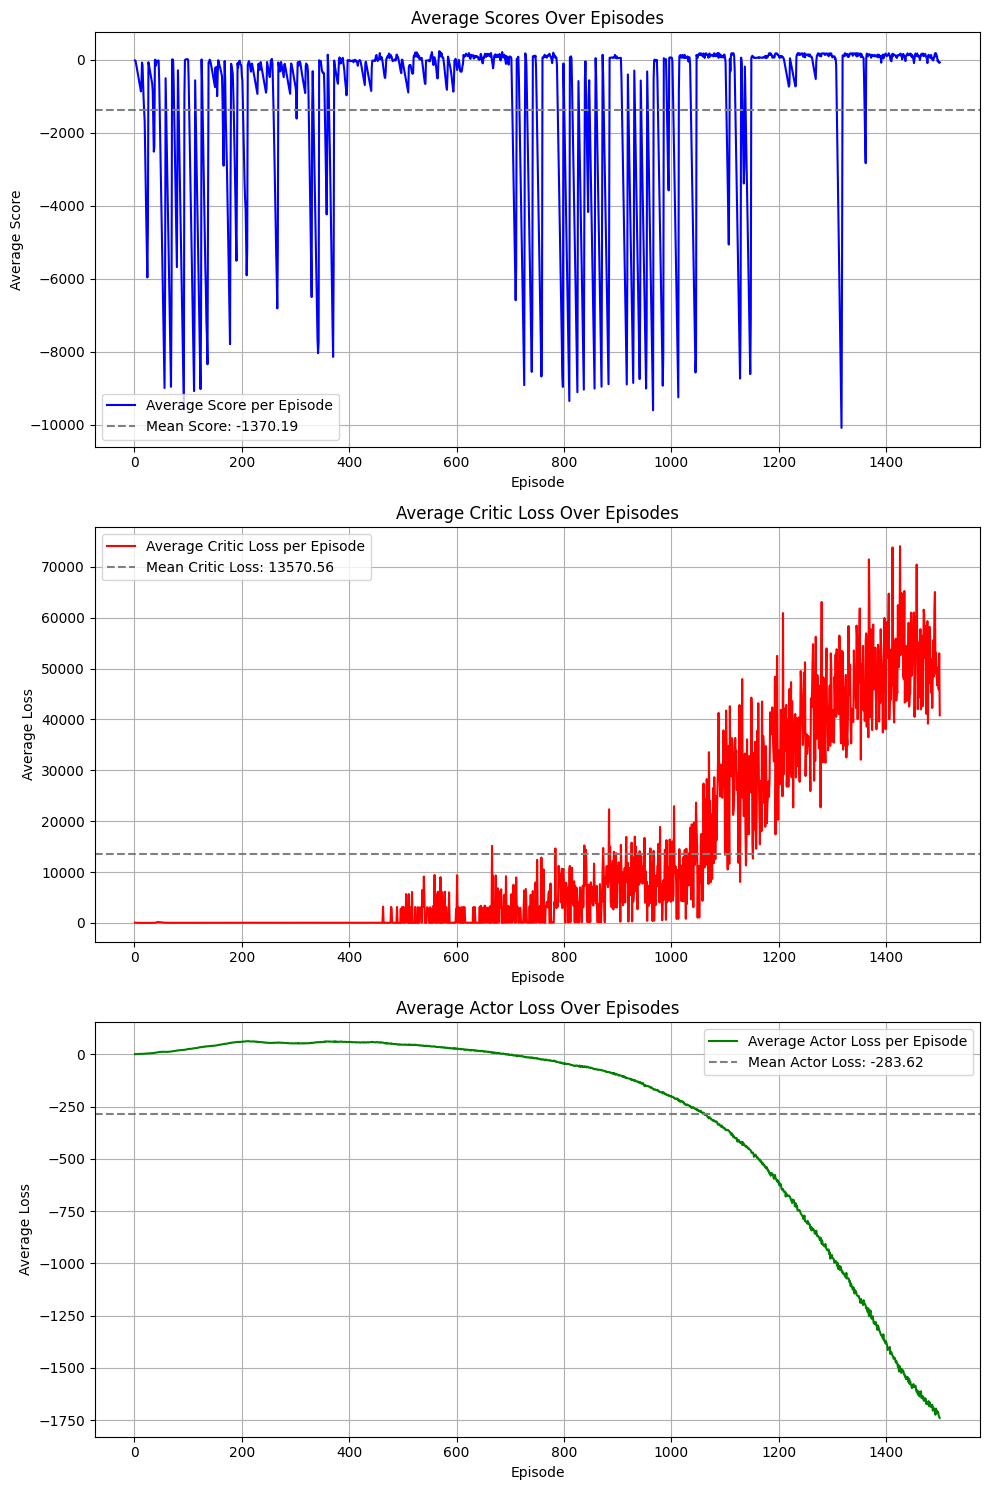

In [14]:
plot_training_results(training_data)

In [15]:
def plot_action_frequency_heatmap(actions):
    actions = np.array(actions)
    plt.figure(figsize=(10, 8))
    if actions.ndim > 1 and actions.shape[1] == 2:
        # Using a 2D histogram for two-dimensional actions
        plt.hist2d(actions[:, 0], actions[:, 1], bins=40, cmap='viridis', cmin=1)
        plt.colorbar(label='Frequency')
        plt.title('Joint Distribution of Left and Right Wheel Velocities')
        plt.xlabel('Left Wheel Velocity')
        plt.ylabel('Right Wheel Velocity')
        plt.grid(True)
        plt.show()
    else:
        # Fallback to a simple histogram if actions are not in the expected format
        sns.histplot(actions, bins=40, kde=True, color='blue')
        plt.title('Action Distribution')
        plt.xlabel('Action Value')
        plt.ylabel('Frequency')
        plt.show()

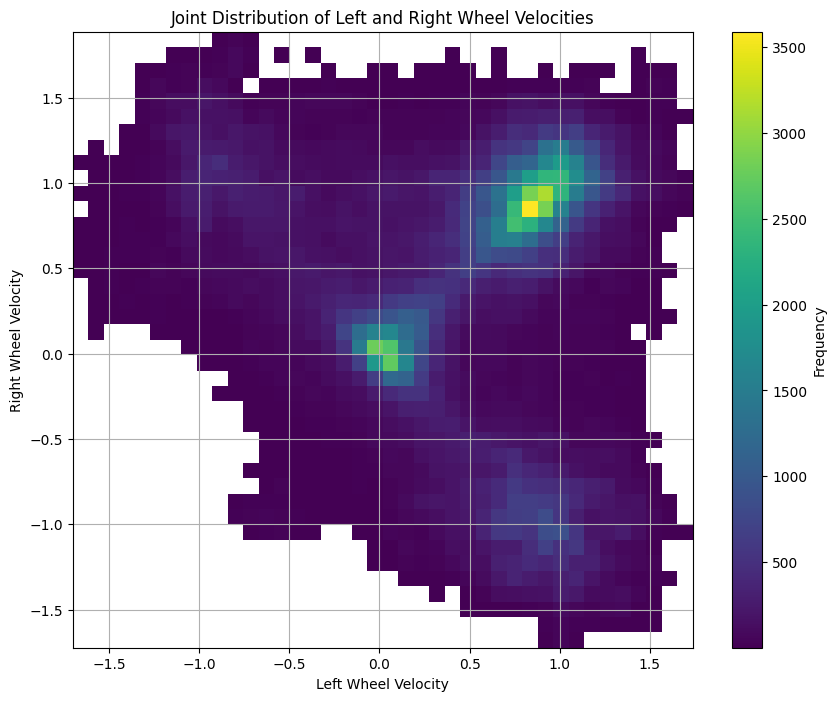

In [16]:

plot_action_frequency_heatmap(training_data['actions'])

In [17]:
def plot_state_transitions(states):
    states = np.array(states)
    plt.figure(figsize=(12, 10))
    if states.shape[1] >= 2:
        # Using the first two dimensions for x, y plotting
        plt.plot(states[:, 0], states[:, 1], 'r-', label='Path')
        plt.scatter(states[:, 0], states[:, 1], c=np.linspace(0, 1, len(states)), cmap='viridis', s=50, edgecolor='black', label='States over Time')
        plt.colorbar(label='Time Step')
        plt.title('Robot Path in Environment')
        plt.xlabel('X Position')
        plt.ylabel('Y Position')
        plt.grid(True)
        plt.legend()
        plt.show()
    else:
        plt.plot(states, np.arange(len(states)), 'r-', label='Path')
        plt.scatter(states, np.arange(len(states)), c=np.linspace(0, 1, len(states)), cmap='viridis', label='States over Time')
        plt.colorbar(label='Time Step')
        plt.title('State Transitions')
        plt.xlabel('State Dimension 1')
        plt.ylabel('State Dimension 2' if states.shape[1] >= 2 else 'Time Step')
        plt.grid(True)
        plt.legend()
        plt.show()

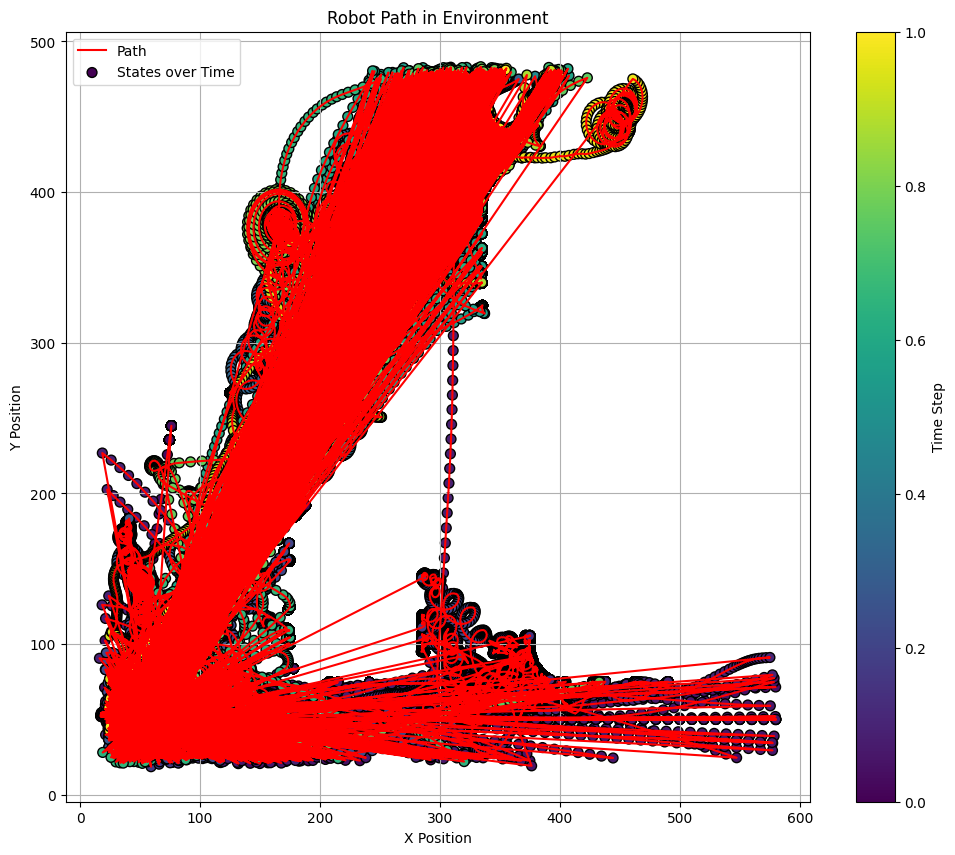

In [18]:
plot_state_transitions(training_data['states'])

In [22]:
def load_and_simulate(env, agent, n_episodes=5, max_steps=500):
    states = []
    actions = []
    rewards = []
    steps_per_episode = []

    for episode in range(n_episodes):
        state, info = env.reset()
        done = False
        total_reward = 0
        steps = 0

        while not done and steps < max_steps:
            env.render()  # Optional: Comment this out if you don't need to visually inspect the simulation
            action = agent.choose_action(state)
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            total_reward += reward
            steps += 1

            states.append(state)
            actions.append(action)

        rewards.append(total_reward)
        steps_per_episode.append(steps)

        print(f"Episode {episode + 1}: Total reward = {total_reward}, Steps = {steps}")

    env.close()  # Close the environment when done
    return states, actions, rewards, steps_per_episode


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_policy_heatmap(states, actions, env_width, env_height, grid_size=(40, 40)):
    # Define the grid edges based on the environment dimensions
    x_edges = np.linspace(0, env_width, grid_size[0] + 1)
    y_edges = np.linspace(0, env_height, grid_size[1] + 1)

    # Initialize the policy grid for each action dimension
    policy_grid_left = np.zeros(grid_size, dtype=np.float64)
    policy_grid_right = np.zeros(grid_size, dtype=np.float64)
    
    # Initialize count grid to track number of entries per cell for averaging
    count_grid = np.zeros(grid_size, dtype=np.int32)

    # Process each state and corresponding action
    for state, action in zip(states, actions):
        x_idx = np.digitize(state[0], x_edges) - 1  # X coordinate
        y_idx = np.digitize(state[1], y_edges) - 1  # Y coordinate

        # Ensure indices are within the grid bounds
        x_idx = max(0, min(x_idx, grid_size[0] - 1))
        y_idx = max(0, min(y_idx, grid_size[1] - 1))

        # Sum actions at this grid location
        policy_grid_left[y_idx, x_idx] += action[0]
        policy_grid_right[y_idx, x_idx] += action[1]
        count_grid[y_idx, x_idx] += 1

    # Normalize the policy grid by the counts to get mean actions
    policy_grid_left /= np.maximum(count_grid, 1)  # avoid division by zero
    policy_grid_right /= np.maximum(count_grid, 1)  # avoid division by zero

    return policy_grid_left, policy_grid_right

def plot_policy_heatmap(policy_grid_left, policy_grid_right, title='Policy Heatmap'):
    fig, axs = plt.subplots(ncols=2, figsize=(16, 6))

    sns.heatmap(policy_grid_left, ax=axs[0], cmap='viridis', cbar=True)
    axs[0].set_title('Left Wheel Velocity')
    axs[0].set_xlabel('X Coordinate')
    axs[0].set_ylabel('Y Coordinate')

    sns.heatmap(policy_grid_right, ax=axs[1], cmap='viridis', cbar=True)
    axs[1].set_title('Right Wheel Velocity')
    axs[1].set_xlabel('X Coordinate')
    axs[1].set_ylabel('Y Coordinate')

    plt.suptitle(title)
    plt.show()


In [25]:
def main():
    env = EscapeRoomEnv(max_steps_per_episode=500, goal= (350,450))
    agent = Agent(
        alpha=0.0001,
        beta=0.001,
        input_dims=env.observation_space.shape,
        tau=0.001,
        fc1_dims=400,
        fc2_dims=300,
        n_actions=env.action_space.shape[0],
        batch_size=64,
    )

     # Assume agent.load_models is properly implemented
    agent.load_models()

    states, actions, rewards, steps_per_episode = load_and_simulate(env, agent, n_episodes=5, max_steps=1000)

    policy_grid_left, policy_grid_right = create_policy_heatmap(states, actions, ENV_WIDTH, ENV_HEIGHT)
    plot_policy_heatmap(policy_grid_left, policy_grid_right, title='Differential Drive Policy Heatmap')
    

if __name__ == "__main__":
    main()


KeyboardInterrupt: 